# **1. Data Sourcing** 
**Context**
An anonymous salary survey has been conducted annually since 2015 among European IT specialists with a stronger focus on Germany. This year 1238 respondents volunteered to participate in the survey. The data has been made publicly available by the authors.
The dataset contains rich information about the salary patterns among the IT professionals in the EU region and offers some great insights.
https://www.kaggle.com/parulpandey/2020-it-salary-survey-for-eu-region

In [ ]:
!pip install klib

In [ ]:
# Update the scipy library
!pip install -U scipy

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
survey_2020 = 'https://raw.githubusercontent.com/thaoha96/IT_SalarySurvey_EU/main/IT%20Salary%20Survey%20EU%20%202020.csv'

In [ ]:
import pandas as pd
import numpy as np
import klib
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.cm import ScalarMappable
from collections import Counter
from numpy.core.fromnumeric import size

# preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# models
## Scikit-Learn
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## Statsmodels
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
origin_data = pd.read_csv(survey_2020)
data = origin_data.copy()
data.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


# **2. General Analysis**


## Info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [ ]:
data = data.loc[:, data.columns != "Timestamp"]

In [ ]:
categorical_columns = list(data.select_dtypes(include = 'object').columns)
print("\nCategorical variables: ", categorical_columns)
numerical_columns = list(data.select_dtypes(include = 'number').columns)
print("\nNumerical variables: ", numerical_columns)


Categorical variables:  ['Gender', 'City', 'Position ', 'Total years of experience', 'Years of experience in Germany', 'Seniority level', 'Your main technology / programming language', 'Other technologies/programming languages you use often', 'Yearly bonus + stocks in EUR', 'Annual bonus+stocks one year ago. Only answer if staying in same country', 'Number of vacation days', 'Employment status', 'Сontract duration', 'Main language at work', 'Company size', 'Company type', 'Have you lost your job due to the coronavirus outbreak?', 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

Numerical variables:  ['Age', 'Yearly brutto salary (without bonus and stocks) in EUR', 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country', 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week']


Drop Timestamp from data 

In [ ]:
data.describe()
data.describe(include = 'object')

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly bonus + stocks in EUR,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
count,1243,1253,1247,1237,1221,1241,1126,1096,829,614,1185,1236,1224,1237,1235,1228,1233,462
unique,3,119,148,48,53,24,256,562,168,131,45,11,3,14,5,63,10,59
top,Male,Berlin,Software Engineer,10,2,Senior,Java,Javascript / Typescript,0,0,30,Full-time employee,Unlimited contract,English,1000+,Product,No,0
freq,1049,681,387,138,195,565,184,44,227,200,488,1190,1159,1020,448,760,1162,161


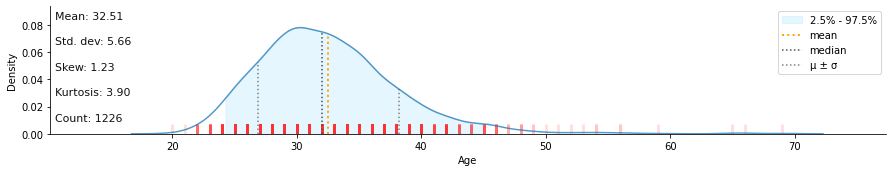

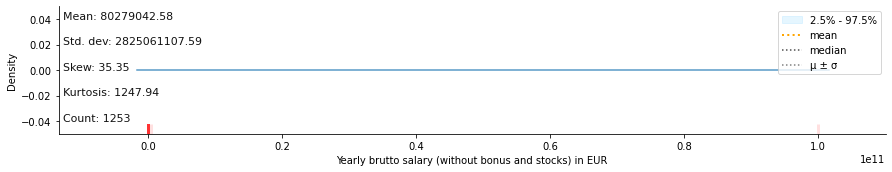

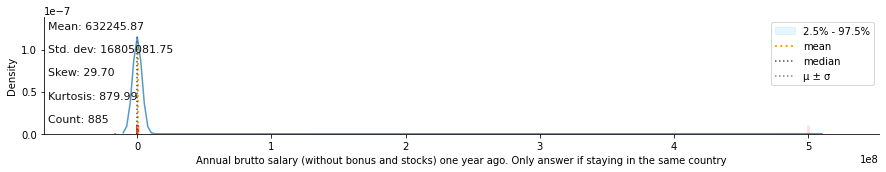

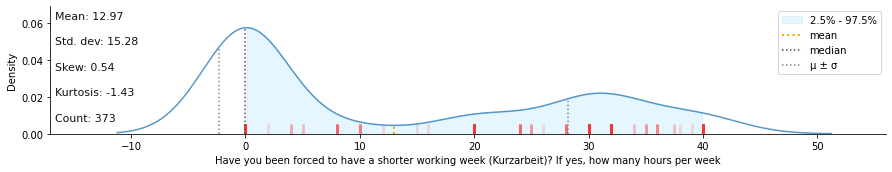

In [ ]:
klib.dist_plot(data)

# **3. Background information**

In [ ]:
year = 2020

## 3.1. Respondents in the survey

### Age

In [ ]:
data['Age'].describe()

count    1226.000000
mean       32.509788
std         5.663804
min        20.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        69.000000
Name: Age, dtype: float64

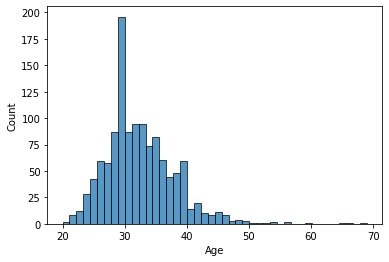

In [ ]:
sns.histplot(data['Age'])

In [ ]:
replacing_value = data['Age'].mode()[0]
data.fillna({'Age': replacing_value}, inplace = True)

In [ ]:
data['Age'] = data['Age'].astype(int)

<Figure size 1080x576 with 0 Axes>

Text(-0.10000000000000003, 1.3, '1')

Text(0.8999999999999999, 1.3, '1')

Text(1.9000000000000001, 8.3, '8')

Text(2.9, 12.3, '12')

Text(3.9, 28.3, '28')

Text(4.8999999999999995, 42.3, '42')

Text(5.8999999999999995, 59.3, '59')

Text(6.8999999999999995, 58.3, '58')

Text(7.8999999999999995, 87.3, '87')

Text(8.9, 86.3, '86')

Text(9.9, 137.3, '137')

Text(10.9, 87.3, '87')

Text(11.9, 94.3, '94')

Text(12.9, 94.3, '94')

Text(13.9, 74.3, '74')

Text(14.9, 82.3, '82')

Text(15.9, 60.3, '60')

Text(16.900000000000002, 44.3, '44')

Text(17.900000000000002, 48.3, '48')

Text(18.900000000000002, 28.3, '28')

Text(19.900000000000002, 31.3, '31')

Text(20.900000000000002, 14.3, '14')

Text(21.900000000000002, 20.3, '20')

Text(22.900000000000002, 10.3, '10')

Text(23.900000000000002, 8.3, '8')

Text(24.900000000000002, 11.3, '11')

Text(25.900000000000002, 8.3, '8')

Text(26.900000000000002, 3.3, '3')

Text(27.900000000000002, 4.3, '4')

Text(28.900000000000002, 2.3, '2')

Text(29.900000000000002, 1.3, '1')

Text(30.900000000000002, 1.3, '1')

Text(31.900000000000002, 1.3, '1')

Text(32.9, 1.3, '1')

Text(33.9, 2.3, '2')

Text(34.9, 2.3, '2')

Text(35.9, 1.3, '1')

Text(36.9, 1.3, '1')

Text(37.9, 1.3, '1')

Text(38.9, 1.3, '1')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

Text(0.5, 0, 'Age of survey respondents in 2020')

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

Text(0, 0.5, 'Frequency')

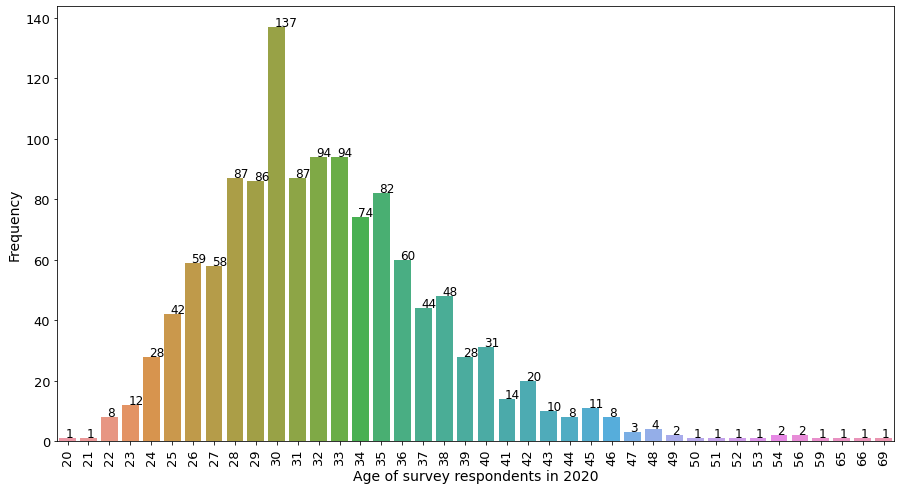

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data=data,x='Age')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+0.3, p.get_height()+0.3), fontsize=12)
        
plt.xticks(fontsize=13,rotation=90)
plt.xlabel(f'Age of survey respondents in {year}',fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Frequency",fontsize=14)
plt.show()

### Gender

<Figure size 1080x576 with 0 Axes>

Text(-0.10000000000000003, 1049.3, '1049')

Text(0.8999999999999999, 192.3, '192')

Text(1.9000000000000001, 2.3, '2')

Text(0.5, 0, 'Gender')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'In 2020')

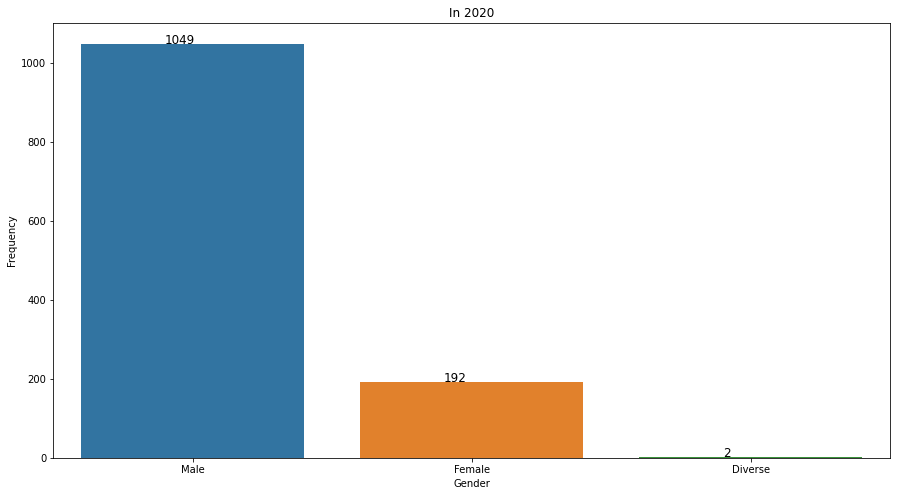

In [ ]:
plt.figure(figsize = (15, 8))
ax = sns.countplot(data=data,x='Gender')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+0.3, p.get_height()+0.3), fontsize=12)
        
plt.xlabel("Gender")
plt.xticks(rotation =  0)
plt.ylabel("Frequency")
plt.title(f'In {year}')
plt.show()

Text(0, 0.5, '')

Text(0.5, 0, 'Gender, in %')

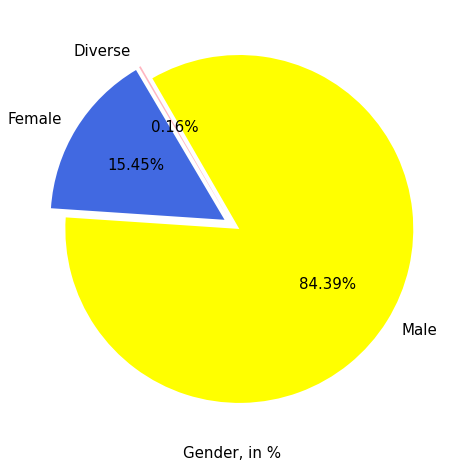

In [ ]:
labels = data['Gender'].value_counts().keys().to_list()

# fig, ax = plt.subplots(1,3, figsize=(21,10))
data.groupby('Gender').size().plot(kind='pie', 
                                            autopct='%.2f%%',
                                            startangle=120, 
                                            textprops={'fontsize': 15}, 
                                            # labels = labels,
                                            figsize=(12,8),
                                            colors=['lightpink','royalblue', 'yellow'],
                                            explode = [0.05]*3
                                  )

plt.ylabel('')
plt.xlabel('Gender, in %', fontsize=15)
plt.show()


### City

In [ ]:
data['City'].value_counts().head(10)

Berlin        681
Munich        236
Frankfurt      44
Hamburg        40
Stuttgart      26
Cologne        20
Amsterdam       9
Stuttgart       7
Prague          6
Karlsruhe       6
Name: City, dtype: int64

<Figure size 1080x576 with 0 Axes>

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text major ticklabel objects>)

Text(0.5, 0, 'Frequency')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

Text(0, 0.5, 'City')

Text(0.5, 1.0, 'In 2020')

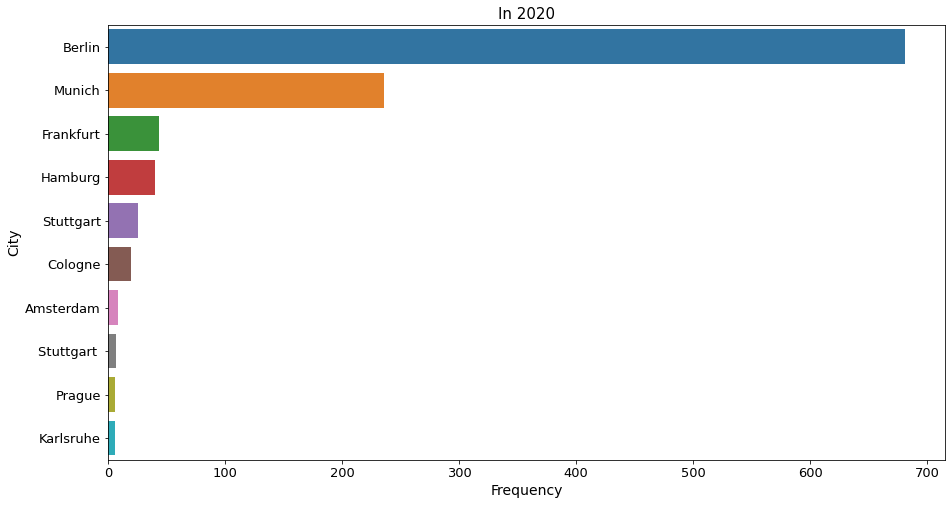

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=data['City'].value_counts().head(10).reset_index(),
        y='index',x='City')

labels = data['City'].value_counts().head(10).keys().to_list()
legends=[]
for i, item in enumerate(labels):
   count_cities = data.groupby('City').size()[labels[i]]
   legends.append(f'{item}, {count_cities}')

plt.xticks(fontsize=13)
plt.xlabel("Frequency",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("City",fontsize=14)
plt.title(f"In {year}", fontsize = 15)
plt.show()

### Main language at work

In [ ]:
data['Main language at work'].isnull().sum()

16

In [ ]:
replacing_value = data['Main language at work'].mode()[0]
data['Main language at work'] = data['Main language at work'].fillna(value = replacing_value)

<Figure size 720x288 with 0 Axes>

Text(-0.10000000000000003, 1036.3, '1036')

Text(0.8999999999999999, 186.3, '186')

Text(1.9000000000000001, 12.3, '12')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

Text(0, 0.5, 'Frequency')

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 0, 'Main language at work')

Text(0.5, 1.0, 'In 2020')

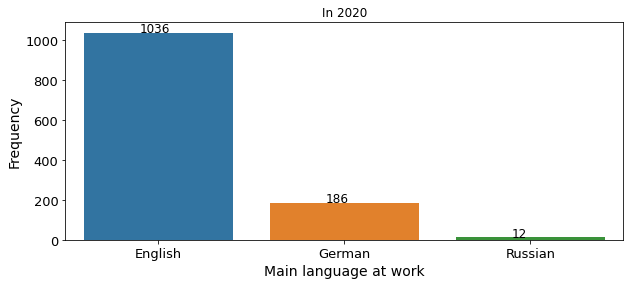

In [ ]:
plt.figure(figsize=(10,4))
list_top_lang = data['Main language at work'].value_counts().head(3).keys().to_list()
ax = sns.countplot(data=data[data['Main language at work'].isin(list_top_lang)].reset_index(),
        x='Main language at work')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+0.3, p.get_height()+0.3), fontsize=12)
plt.xticks(fontsize=13)
plt.ylabel("Frequency",fontsize=14)
plt.yticks(fontsize=13)
plt.xlabel("Main language at work",fontsize=14)
plt.title(f"In {year}")
plt.show()

### Employment status

In [ ]:
data['Employment status'].isnull().sum()

17

In [ ]:
replacing_value = data['Employment status'].mode()[0]
data['Employment status'] = data['Employment status'].fillna(value = replacing_value)

In [ ]:
data['Employment status'].value_counts()

Full-time employee                                                                 1207
Self-employed (freelancer)                                                           28
Part-time employee                                                                    8
Founder                                                                               3
Company Director                                                                      1
working student                                                                       1
Working Student                                                                       1
Full-time position, part-time position, & self-employed (freelancing, tutoring)       1
Intern                                                                                1
full-time, but 32 hours per week (it was my request, I'm a student)                   1
Werkstudent                                                                           1
Name: Employment status, dtype: 

## 3.2. Company

### Company size

In [ ]:
data['Company size'].value_counts()

1000+       448
101-1000    405
11-50       174
51-100      147
up to 10     61
Name: Company size, dtype: int64

In [ ]:
data['Company size'] = data['Company size'].replace({'up to 10':'1', '11-50':'2', '51-100':'3', '101-1000':'4', '1000+':'5'})

Text(0, 0.5, '')

Text(0.5, 0, 'Company size')

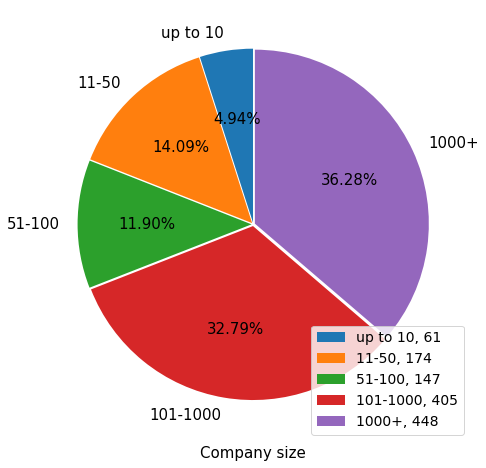

In [ ]:
labels = ['up to 10','11-50','51-100','101-1000','1000+']
new_labels = ['1','2','3','4','5']
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
legends = []
for i, item in enumerate(labels):
   count_companies = data.groupby('Company size').size()[f'{i+1}']
   legends.append(f'{item}, {count_companies}')

# fig, ax = plt.subplots(1,3, figsize=(21,10))
data.groupby('Company size').size().plot(kind='pie', 
                                            autopct='%.2f%%',
                                            startangle=90, 
                                            textprops={'fontsize': 15}, 
                                            labels = labels,
                                            figsize=(16,8), 
                                            explode = [0.01]*5
                                  )

plt.ylabel('')
plt.xlabel('Company size', fontsize=15)
plt.legend(legends, loc =4, fontsize = 14)
plt.show()


### Company type

In [ ]:
data['Company type'].nunique()

63

In [ ]:
data['Company type'] = data['Company type'].fillna(value = 'Not Specified')

In [ ]:
data['Company type'] = data['Company type'].apply(lambda x:x.strip())
data['Company type'] = data['Company type'].apply(lambda x:x.lower())
data['Company type'] = data['Company type'].apply(lambda x:x.replace('-', ''))

In [ ]:
list_words = data['Company type'].value_counts().keys()
patterns = ['consult', 'product', 'startup']
replacing_patterns = ['Consulting / Agency', 'Product' , 'Startup']

In [ ]:
def search_keyword(texts, pattern):
  pos = []
  for i,text in enumerate(texts):
    if re.search(pattern, text):
          pos.append(i)
  return pos

# Get position of keywords in list
positions = {}
for pattern in patterns:
  positions[pattern] = search_keyword(list_words, pattern)

# Get those words in original list in order to replace it 
keywords = {}
for pattern in patterns:
  keywords[pattern] = [list_words[i] for i in positions[pattern]]

# Replacing them with words we want to change
for i,pattern in enumerate(patterns):
  words = keywords[pattern]
  for word in words:
    data['Company type'] = data['Company type'].replace({word:replacing_patterns[i]})

# Set other types
set_comp_type = set(data['Company type'].value_counts().keys())
main_type = ['Product', 'Startup', 'Consulting / Agency']
other_types = set_comp_type - set(main_type)
for word in other_types:
    data['Company type'] = data['Company type'].replace({word:'Other types'})

Text(0, 0.5, '')

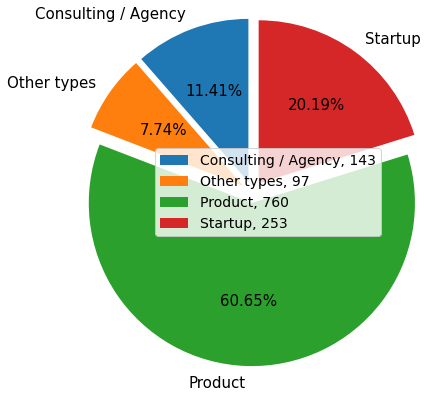

In [ ]:
list_company_type =  list(data['Company type'].value_counts().keys())
list_company_type.sort()
labels = []
for item in list_company_type:
   count_type = data['Company type'].value_counts()[item]
   labels.append(f'{item}, {count_type}')
labels.sort()
data.groupby('Company type').size().plot(kind='pie', 
                                            autopct='%.2f%%',
                                            startangle=90, 
                                            textprops={'fontsize': 15},
                                            figsize=(10,5),
                                            radius = 1.5,
                                            labels = list_company_type,
                                            # shadow=True,
 #                                           explode=(0, 0.5, 0, 0, 0, 0.1, 0.3, 0),
                                            explode=[0.1]*4,
                                  )

plt.ylabel('')
plt.legend(labels, loc=5, fontsize= 14)
plt.show()

In [ ]:
selected_cols = ['Main language at work','Company type']
new_df = data[selected_cols]
new_df = new_df[new_df['Main language at work'].isin(list_top_lang)]

In [ ]:
CrosstabResult=pd.crosstab(index=new_df['Company type'],columns=new_df['Main language at work'])
print(CrosstabResult)

Main language at work  English  German  Russian
Company type                                   
Consulting / Agency         89      46        0
Other types                 68      26        1
Product                    639     104        8
Startup                    240      10        3


Text(-0.25, 89.2, '89')

Text(0.75, 68.2, '68')

Text(1.75, 639.2, '639')

Text(2.75, 240.2, '240')

Text(-0.08333333333333333, 46.2, '46')

Text(0.9166666666666666, 26.2, '26')

Text(1.9166666666666667, 104.2, '104')

Text(2.9166666666666665, 10.2, '10')

Text(0.08333333333333331, 0.2, '0')

Text(1.0833333333333333, 1.2, '1')

Text(2.083333333333333, 8.2, '8')

Text(3.083333333333333, 3.2, '3')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

Text(0, 0.5, 'Frequency')

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 <a list of 8 Text major ticklabel objects>)

Text(0.5, 0, 'Language per Company type')

Text(0.5, 1.0, 'In 2020')

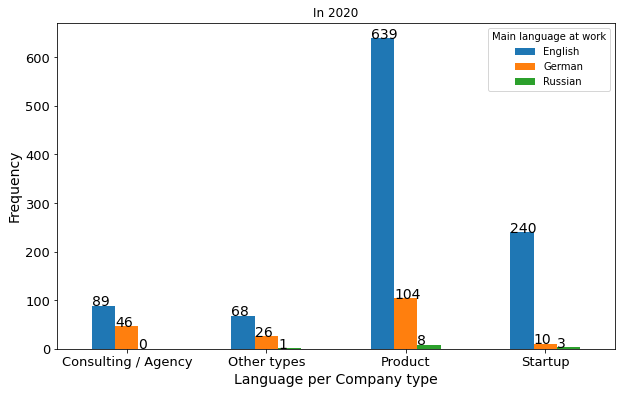

In [ ]:

ax = CrosstabResult.plot.bar(figsize=(10,6), rot=0)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x(), p.get_height()+0.2), fontsize=14)

plt.xticks(fontsize=13)
plt.ylabel("Frequency",fontsize=14)
plt.yticks(fontsize=13)
plt.xlabel("Language per Company type",fontsize=14)
plt.title(f"In {year}")
plt.show()       

# **4.EDA**

## 4.1.Salary

In [ ]:
data = data.rename(columns = {
    'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country': 'Annual brutto salary (without bonus and stocks) one year ago',
    'Annual bonus+stocks one year ago. Only answer if staying in same country': 'Annual bonus+stocks one year ago'})

In [ ]:
selected_col_1 = 'Yearly brutto salary (without bonus and stocks) in EUR'
selected_col_2 = 'Annual brutto salary (without bonus and stocks) one year ago'
selected_col_3 = 'Yearly bonus + stocks in EUR'
selected_col_4 = 'Annual bonus+stocks one year ago'
selected_cols = [selected_col_1, selected_col_2, selected_col_3, selected_col_4]

In [ ]:
for col in selected_cols:
  print(f"Number of missing values in {year} survey data for <{col}>: ",data[col].isnull().sum())

Number of missing values in 2020 survey data for <Yearly brutto salary (without bonus and stocks) in EUR>:  0
Number of missing values in 2020 survey data for <Annual brutto salary (without bonus and stocks) one year ago>:  368
Number of missing values in 2020 survey data for <Yearly bonus + stocks in EUR>:  424
Number of missing values in 2020 survey data for <Annual bonus+stocks one year ago>:  639


### Yearly brutto salary (without bonus and stocks) in EUR

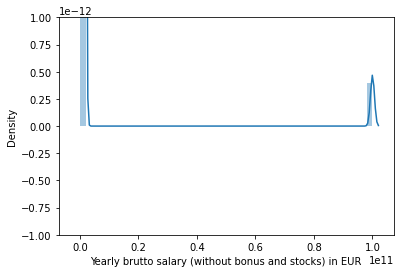

In [ ]:
sns.distplot(data['Yearly brutto salary (without bonus and stocks) in EUR'])

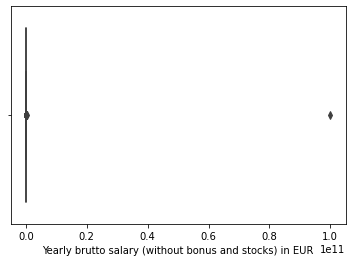

In [ ]:
sns.boxplot(data['Yearly brutto salary (without bonus and stocks) in EUR'])

In [ ]:
# Removing Outlier using IQR

df = data['Yearly brutto salary (without bonus and stocks) in EUR']

p25 = df.quantile(0.25) 
p75 = df.quantile(0.75) 
iqr = p75 - p25
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr 

condition = (df> lower_limit) & (df < upper_limit)
# New DataFrame after removing the outlier 
new_df = data[condition]

# Checking the difference
outlier_salary = data[~condition]

data = new_df.copy()

In [ ]:
outlier_salary

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago,Annual bonus+stocks one year ago,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
2,29,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,4,Product,Yes,NaN,NaN
35,33,Male,Berlin,Data Scientist,5,4,Lead,Python,"Python, R, Google Cloud, Docker",150000.0,80000,81000.0,4000,24,Full-time employee,Unlimited contract,English,5,Product,No,0.0,1
107,35,Male,Frankfurt,ML Engineer,12,10,Senior,ML,"Python, Java / Scala, R, SQL, AWS, Azure",120000.0,30000,90000.0,30000,30,Full-time employee,Unlimited contract,English,5,Product,No,0.0,NaN
131,34,Male,Munich,NaN,17,6,Lead,Java,"Python, Java / Scala, R, SQL, Go, AWS, Google ...",120000.0,20000,110000.0,10000,32,Full-time employee,Unlimited contract,German,5,Consulting / Agency,No,NaN,5000
141,34,Male,Munich,Cloud Architect,10,4,Senior,"Azure, SAP","SAP / ABAP, AWS, Google Cloud, Azure, Kubernet...",120000.0,40000,70000.0,30000,30,Full-time employee,Unlimited contract,English,5,Other types,No,0.0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,24,Female,Munich,Software Engineer,less than year,less than year,student,"Python, database technologies","Python, Java / Scala, SQL, AWS",16320.0,16320,NaN,NaN,10,Part-time employee,Unlimited contract,English,2,Startup,No,NaN,NaN
1223,45,Male,Munich,Software Engineer,20,20,Self employed,".net, c++, spss, embeddded","C/C++, .NET, Go",200000.0,15000,200000.0,15000,30,Self-employed (freelancer),NaN,German,1,Other types,No,NaN,No
1234,26,Male,Saint-Petersburg,Project Manager,5,NaN,Middle,Python,"Python, .NET, Azure",20000.0,2000,NaN,NaN,24,Full-time employee,Unlimited contract,Russian,5,Product,Yes,NaN,NaN
1235,26,Male,Saint-Petersburg,Project Manager,5,NaN,Middle,Python,"Python, .NET, Azure",20000.0,2000,NaN,NaN,24,Full-time employee,Unlimited contract,Russian,5,Product,Yes,NaN,NaN


### Annual brutto salary (without bonus and stocks) one year ago

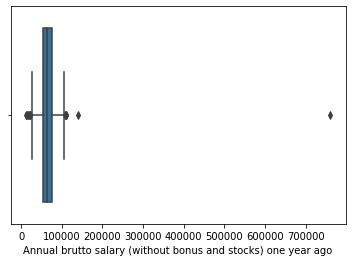

In [ ]:
sns.boxplot(data[selected_col_2])

### 'Yearly bonus + stocks in EUR'

In [ ]:
list_words = ['bvg only','Not sure', 'depends']
data = data[~ (data[selected_col_3].isin(list_words))]
data[selected_col_3] = data[selected_col_3].replace({'15000+-':'15000','Na':'0', '-':'0'})
data[selected_col_3] = data[selected_col_3].fillna(value = '0')
data[selected_col_3] = data[selected_col_3].astype('float')

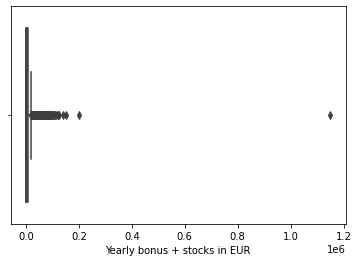

In [ ]:
sns.boxplot(data[selected_col_3])

### Annual bonus+stocks one year ago

In [ ]:
data[selected_col_4] = data[selected_col_4].replace({'-':'0'})

In [ ]:
data[selected_col_4] = data[selected_col_4].astype('float')

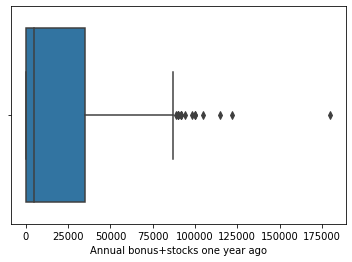

In [ ]:
sns.boxplot(data[selected_col_4])

## 4.2. Salary with bonuses and without bonuses between current year and last year

In [ ]:
data['Total salary with bonus and stocks'] = data[selected_col_1] + data[selected_col_3]
data['Total salary with bonus and stocks one year ago'] = data[selected_col_2] + data[selected_col_4]

In [ ]:
df_salary = data[[selected_col_1, selected_col_2, selected_col_3, selected_col_4]]
df_salary = df_salary.dropna(subset = [selected_col_2])
df_salary.head()

,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago,Yearly bonus + stocks in EUR,Annual bonus+stocks one year ago
0,80000.0,75000.0,5000.0,10000.0
1,80000.0,82000.0,0.0,5000.0
4,62000.0,62000.0,0.0,NaN
5,76000.0,76000.0,5000.0,5000.0
7,65000.0,65000.0,0.0,NaN


In [ ]:
data[[selected_col_1, selected_col_2, selected_col_3, selected_col_4]].shape
df_salary.shape

(1168, 4)

(831, 4)

In [ ]:
# df_salary = df_salary[df_salary[selected_col_1] < 850000]
df_salary = df_salary[df_salary[selected_col_2] < 150000]
df_salary = df_salary[df_salary[selected_col_3] < 1150000]

In [ ]:
df_salary['Total salary with bonus and stocks'] = df_salary[selected_col_1] + df_salary[selected_col_3]
df_salary['Total salary with bonus and stocks one year ago'] = df_salary[selected_col_2] + df_salary[selected_col_4]

In [ ]:
df_salary['Yearly brutto salary (without bonus and stocks) in EUR'].median()

70000.0

In [ ]:
df_salary['Annual brutto salary (without bonus and stocks) one year ago'].median()

65000.0

<Figure size 864x720 with 0 Axes>

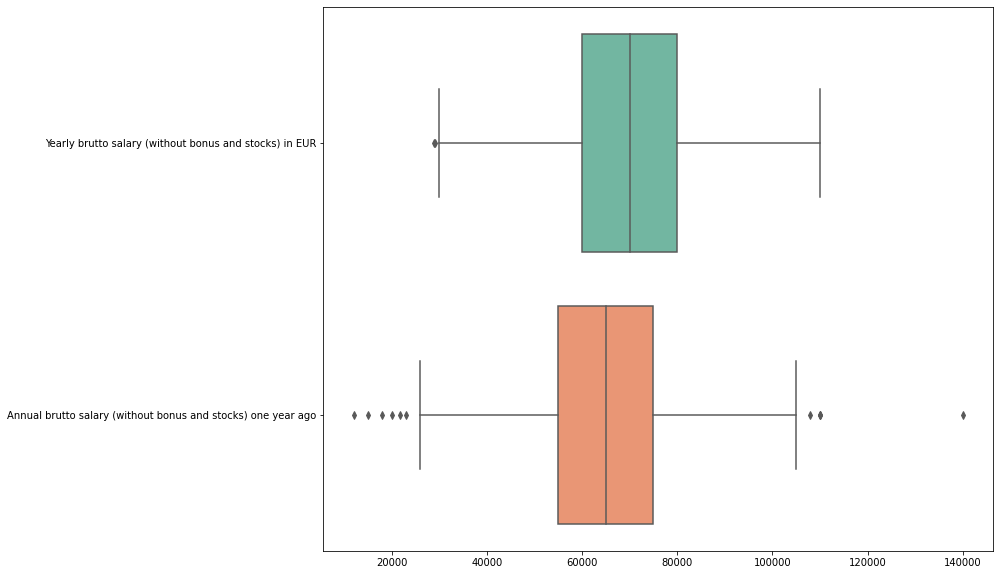

In [ ]:
plt.figure(figsize=(12,10))
ax = sns.boxplot(data=df_salary[[selected_col_1, selected_col_2]], orient="h", palette="Set2")

In [ ]:
df_salary['Total salary with bonus and stocks'].median()

75000.0

In [ ]:
df_salary['Total salary with bonus and stocks one year ago'].median()

75000.0

<Figure size 864x720 with 0 Axes>

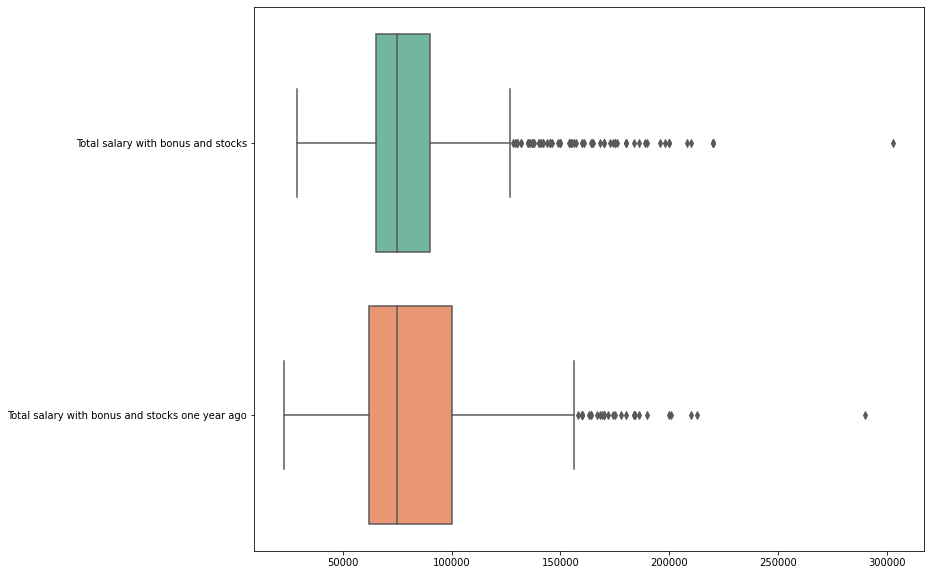

In [ ]:
plt.figure(figsize=(12,10))
ax = sns.boxplot(data=df_salary[['Total salary with bonus and stocks','Total salary with bonus and stocks one year ago']], orient="h", palette="Set2")

In [ ]:
len(data)

1168

## 4.3. Salary vs Features

In [ ]:
# Function to get barplot from data
def plot_barplot(df_input,selected_col,label_col,rotation = None, order = None):
    df_tmp = df_input.groupby(selected_col)[label_col].mean().reset_index()
    df_tmp.sort_values(by = label_col, ascending = True, inplace = True)
    
    my_li = df_tmp[selected_col].to_list()
    
    fig = plt.gcf()
    fig.set_size_inches(10,6)
    if rotation:
        plt.xticks(rotation = 90)
    if order != None:
        sns.barplot(x = selected_col, y = label_col, data = df_input, order = order)
    else:
        sns.barplot(x = selected_col, y = label_col, data = df_input, order = my_li)
    plt.show()

### Age

In 2020


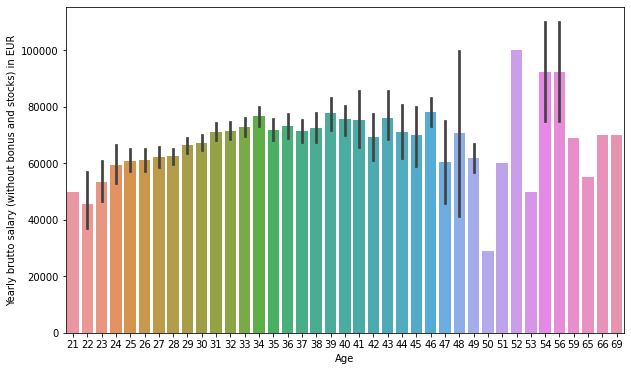

In [ ]:
selected_col = 'Age'
label_col = 'Yearly brutto salary (without bonus and stocks) in EUR'
order = sorted(list(set(data[selected_col])))
rotation = False
print(f'In {year}')
plot_barplot(data,selected_col,label_col,rotation,order)

#### We will devide age into groups

In [ ]:
data.loc[data.Age < 30, 'Age'] = 1
data.loc[(data.Age >= 30) & (data.Age < 40), 'Age'] = 2
data.loc[(data.Age >= 40) & (data.Age < 50), 'Age'] = 3
data.loc[data.Age >= 50, 'Age'] = 4

In 2020


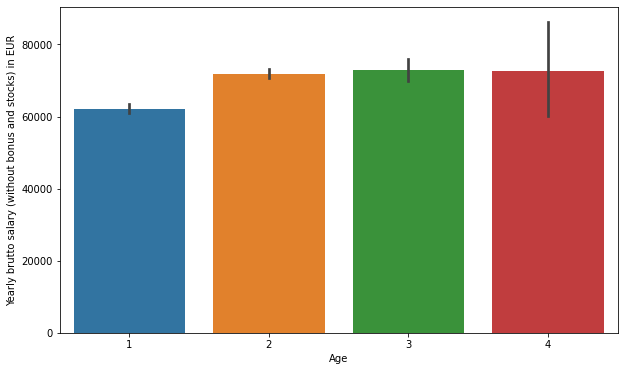

In [ ]:
selected_col = 'Age'
label_col = 'Yearly brutto salary (without bonus and stocks) in EUR'
order = sorted(list(set(data[selected_col])))
rotation = False
print(f'In {year}')
plot_barplot(data,selected_col,label_col,rotation,order)

In [ ]:
data.groupby('Age')['Yearly brutto salary (without bonus and stocks) in EUR'].median()

Age
1    62500.0
2    70000.0
3    75000.0
4    70000.0
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: float64

### Gender

I will only care about 2 groups : Male and Female but I don't want to remove Not Specified data because data is gold, we can use them for different analysis.

In [ ]:
data['Gender'].isnull().sum()

8

In [ ]:
data['Gender'] = data['Gender'].fillna(value = "Not Specified")
data['Gender'].isnull().sum()

0



In 2020


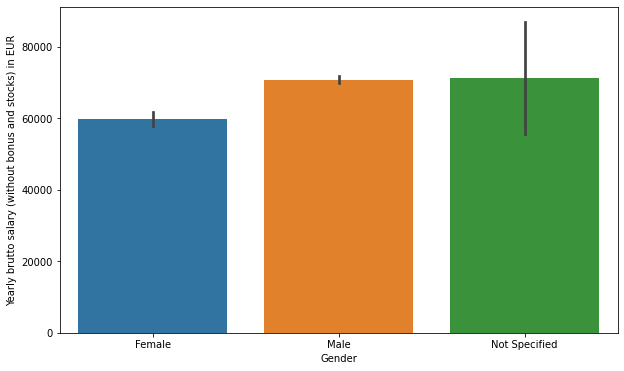

In [ ]:
selected_col = 'Gender'
label_col = 'Yearly brutto salary (without bonus and stocks) in EUR'
order = sorted(list(set(data[selected_col])))
rotation = False
print(f'\n\nIn {year}')
plot_barplot(data,selected_col,label_col,rotation,order)

Text(0, 0.5, '')

Text(0.5, 1.0, 'Gender of respondents')

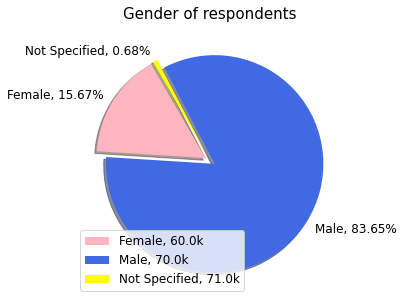

In [ ]:
list_counts =  list(data['Gender'].value_counts().keys())
labels = []
for item in list_counts:
   percentage = round(data['Gender'].value_counts()[item] / data['City'].value_counts().sum() * 100, 2)
   labels.append(f'{item}, {percentage}%')
labels.sort()
legends = []
for item in list_counts:
   median_salary = data.groupby('Gender')['Yearly brutto salary (without bonus and stocks) in EUR'].median()[item]/1000
   legends.append(f'{item}, {median_salary}k')
legends.sort()
data.groupby('Gender').size().plot(kind='pie', 
                                            autopct=None,
                                            startangle=120, 
                                            textprops={'fontsize': 12},
                                            figsize=(10,5),
                                            labels = labels,
                                            radius = 1,
                                            shadow=True, 
                                            colors=['lightpink','royalblue', 'yellow'],
                                            explode=[0.05] * 3,
                                  )
plt.ylabel('')
plt.title('Gender of respondents', fontsize = 15)
plt.legend(legends,  fontsize = 12 )
plt.show()

Text(0, 0.5, '')

Text(0.5, 1.0, 'Gender of respondents')

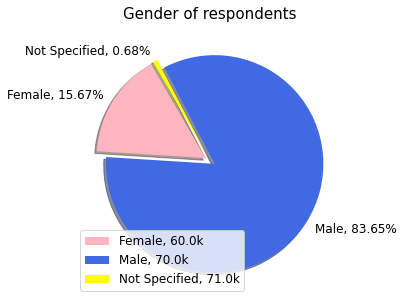

In [ ]:

list_counts =  list(data['Gender'].value_counts().keys())
labels = []
for item in list_counts:
   percentage = round(data['Gender'].value_counts()[item] / data['City'].value_counts().sum() * 100, 2)
   labels.append(f'{item}, {percentage}%')
labels.sort()
legends = []
for item in list_counts:
   median_salary = data.groupby('Gender')['Yearly brutto salary (without bonus and stocks) in EUR'].median()[item]/1000
   legends.append(f'{item}, {median_salary}k')
legends.sort()
data.groupby('Gender').size().plot(kind='pie', 
                                            autopct=None,
                                            startangle=120, 
                                            textprops={'fontsize': 12},
                                            figsize=(10,5),
                                            labels = labels,
                                            radius = 1,
                                            shadow=True, 
                                            colors=['lightpink','royalblue', 'yellow'],
                                            explode=[0.05] * 3,
                                  )
plt.ylabel('')
plt.title('Gender of respondents', fontsize = 15)
plt.legend(legends,  fontsize = 12 )
plt.show()

In [ ]:
data['Gender'].unique()

array(['Male', 'Female', 'Not Specified'], dtype=object)

### City


#### Data Cleaning for City

In [ ]:
data['City'] = data['City'].fillna(value = "Not Specified")
data['City'] = data['City'].apply(lambda x: x.strip().upper())

In [ ]:
data['City'].loc[data['City']=='BÖLINGEN'] = 'BOEBLINGEN'
data['City'].loc[data['City']=='DUSSELDORF'] = 'DUESSELDORF'
data['City'].loc[data['City']=='DÜSSELDORF'] = 'DUESSELDORF'
data['City'].loc[data['City']=='DUSSELDURF'] = 'DUESSELDORF'
data['City'].loc[data['City']=='KÖLN'] = 'COLOGNE'
data['City'].loc[data['City']=='LÜBECK'] = 'LUBECK'
data['City'].loc[data['City']=='MÜNSTER'] = 'MUENSTER'
data['City'].loc[data['City']=='NÜRNBERG'] = 'NUREMBERG'
data['City'].loc[data['City']=='WARSAW, POLAND'] = 'WARSAW'
data['City'].loc[data['City']=='WÜRZBURG'] = 'WURZBURG'
data['City'].loc[data['City']=='SAARBRÜCKEN'] = 'SARREBRUCK'

In [ ]:
selected_col = 'City'
label_col = 'Yearly brutto salary (without bonus and stocks) in EUR'

In [ ]:
data[selected_col].value_counts().keys()

Index(['BERLIN', 'MUNICH', 'FRANKFURT', 'HAMBURG', 'STUTTGART', 'COLOGNE',
       'DUESSELDORF', 'AMSTERDAM', 'NUREMBERG', 'KARLSRUHE', 'HEIDELBERG',
       'PRAGUE', 'STOCKHOLM', 'LONDON', 'HELSINKI', 'MANNHEIM', 'WARSAW',
       'BONN', 'TALLINN', 'BOEBLINGEN', 'INGOLSTADT', 'DARMSTADT', 'HANNOVER',
       'ZURICH', 'WOLFSBURG', 'MOSCOW', 'PARIS', 'ROME', 'MILAN', 'DUBLIN',
       'SIEGEN', 'MADRID', 'KYIV', 'HILDESHEIM', 'REGENSBURG', 'BRUSSELS',
       'LEIPZIG', 'ROSENHEIM', 'VIENNA', 'MURNAU AM STAFFELSEE', 'CAMBRIDGE',
       'JENA', 'CITY IN RUSSIA', 'CRACOW', 'BRUNSWICK', 'KRAKOW', 'AACHEN',
       'SEVILLA', 'COPENHAGEN', 'LUTTICH', 'BARCELONA', 'SOFIA', 'DORTMUND',
       'FR', 'PREFER NOT TO SAY', 'MILANO', 'BIELEFELD', 'INNSBRUCK',
       'NJ, USA', 'ZÜRICH', 'WROCLAW', 'HEILBRONN', 'UTRECHT',
       'SCHLESWIG-HOLSTEIN', 'KONSTANZ AREA', 'KEMPTEN', 'MUENSTER',
       'ERLANGEN', 'MOLDOVA', 'ANSBACH', 'TUTTLINGEN', 'KOBLENZ', 'WURZBURG',
       'DEN HAAG', 'BRAUNSCHWEIG', 

#### Top 5 cities with median salary

In [ ]:
top_5_cities = list(data[selected_col].value_counts().head(5).keys())
top_5_cities
other_cities = list(set(list(data[selected_col].value_counts().keys())) - set(top_5_cities))

['BERLIN', 'MUNICH', 'FRANKFURT', 'HAMBURG', 'STUTTGART']

In [ ]:
df_cities = data.copy()
df_cities['City']= df_cities['City'].replace(to_replace = other_cities, 
                            value = 'OTHER CITIES')

In [ ]:
data['City'].value_counts().head(20)

BERLIN         648
MUNICH         220
FRANKFURT       41
HAMBURG         37
STUTTGART       33
COLOGNE         19
DUESSELDORF     15
AMSTERDAM        9
NUREMBERG        7
KARLSRUHE        7
HEIDELBERG       5
PRAGUE           5
STOCKHOLM        5
LONDON           4
HELSINKI         4
MANNHEIM         4
WARSAW           3
BONN             3
TALLINN          3
BOEBLINGEN       3
Name: City, dtype: int64

Text(0, 0.5, '')

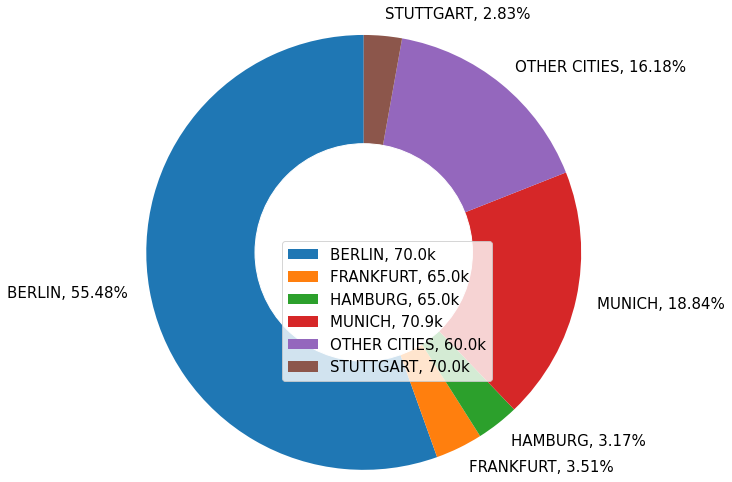

In [ ]:
list_cities =  list(df_cities['City'].value_counts().keys())
labels = []
for item in list_cities:
   percentage = round(df_cities['City'].value_counts()[item] / df_cities['City'].value_counts().sum(), 4) *100
   labels.append(f'{item}, {percentage}%')
labels.sort()
legends = []
for item in list_cities:
   median_salary = df_cities.groupby('City')['Yearly brutto salary (without bonus and stocks) in EUR'].median()[item]/1000
   legends.append(f'{item}, {median_salary}k')
legends.sort()
df_cities.groupby('City').size().plot(kind='pie', 
                                            autopct=None,
                                            startangle=90, 
                                            textprops={'fontsize': 15},
                                            figsize=(10,5),
                                            radius = 2,
                                            labels = labels,
                                  )
plt.ylabel('')
plt.legend(legends, loc=4, fontsize = 15)
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()


### Company size  

In [ ]:
#'up to 10':'1', '11-50':'2', '51-100':'3', '101-1000':'4', '1000+':'5'

Text(0, 0.5, '')

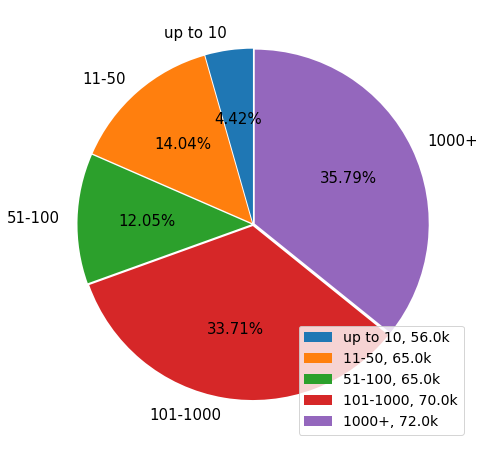

In [ ]:
labels = ['up to 10','11-50','51-100','101-1000','1000+']
new_labels = ['1','2','3','4','5']
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
legends = []
for i, item in enumerate(labels):
   med_salary = data.groupby('Company size')['Yearly brutto salary (without bonus and stocks) in EUR'].median()[f'{i+1}']
   legends.append(f'{item}, {med_salary/1000}k')

# fig, ax = plt.subplots(1,3, figsize=(21,10))
data.groupby('Company size').size().plot(kind='pie', 
                                            autopct='%.2f%%',
                                            startangle=90, 
                                            textprops={'fontsize': 15}, 
                                            labels = labels,
                                            figsize=(16,8), 
                                            explode = [0.01]*5
                                  )

plt.ylabel('')
plt.legend(legends, loc =4, fontsize = 14)
plt.show()


### Company type

In [ ]:
data['Company type'].isnull().sum()

0

Text(0, 0.5, '')

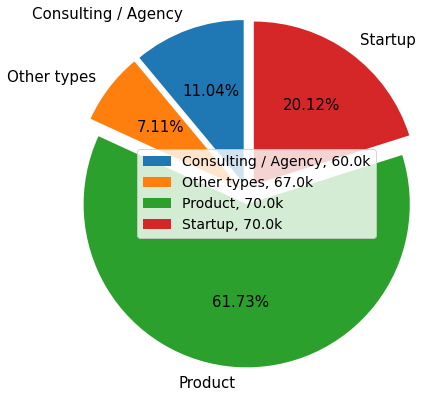

In [ ]:
list_company_type =  list(data['Company type'].value_counts().keys())
list_company_type.sort()

legends = []
for item in list_company_type:
   med_salary = data.groupby('Company type')['Yearly brutto salary (without bonus and stocks) in EUR'].median()[item]
   legends.append(f'{item}, {med_salary/1000}k')

data.groupby('Company type').size().plot(kind='pie', 
                                            autopct='%.2f%%',
                                            startangle=90, 
                                            textprops={'fontsize': 15},
                                            figsize=(10,5),
                                            radius = 1.5,
                                            labels = list_company_type,
                                            explode=[0.1]*4,
                                  )

plt.ylabel('')
plt.legend(legends, loc=5, fontsize= 14)
plt.show()

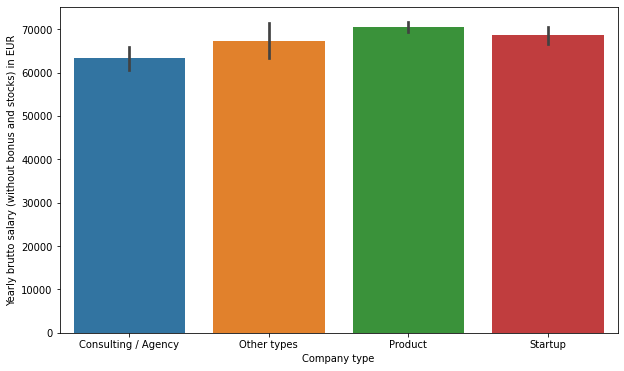

In [ ]:
selected_col = 'Company type'
label_col = 'Yearly brutto salary (without bonus and stocks) in EUR'
order = sorted(list(set(data[selected_col])))
rotation = False
plot_barplot(data,selected_col,label_col,rotation,order)

### Salary vs Position 

#### Data Cleaning for Position

In [ ]:
data = data.rename(columns ={'Position ': 'Position'})

In [ ]:
data['Position'] = data['Position'].fillna(value = "Not Specified")
data['Position'] = data['Position'].apply(lambda x: x.strip().upper())

In [ ]:
data['Position'].value_counts().keys()[:100]

Index(['SOFTWARE ENGINEER', 'BACKEND DEVELOPER', 'DATA SCIENTIST',
       'FRONTEND DEVELOPER', 'QA ENGINEER', 'DEVOPS', 'MOBILE DEVELOPER',
       'ML ENGINEER', 'PRODUCT MANAGER', 'DATA ENGINEER', 'DESIGNER (UI/UX)',
       'DATA ANALYST', 'ENGINEERING MANAGER', 'CONSULTANT', 'SRE',
       'NOT SPECIFIED', 'FULLSTACK DEVELOPER', 'TEAM LEAD', 'PROJECT MANAGER',
       'SECURITY ENGINEER', 'BUSINESS ANALYST', 'SUPPORT ENGINEER',
       'SOLUTIONS ARCHITECT', 'HARDWARE ENGINEER', 'CTO', 'QA MANAGER',
       'IT MANAGER', 'HEAD OF IT', 'SOFTWARE ARCHITECT', 'PRODUCT ANALYST',
       'SENIOR DATA ENGINEER', 'BI DEVELOPER / DATA ENGINEER',
       'SAP CONSULTANT', 'HEAD OF BI', 'BI CONSULTANT SAP/ DATA ENGINEER',
       'SENIOR SCRUM MASTER (RTE)', 'TECH RECRUITING', 'BI ANALYST',
       'TEAMLEAD', 'LEAD SOFTWARE DEVELOPER', 'TECHNICAL PROJECT MANAGER',
       'DANA ANALYST', 'EMBEDDED SOFTWARE ENGINEER', 'ANALYST', 'TEAM MANAGER',
       'BEIKOCH', 'BIG DATA ENGINEER', 'RENTNER',
       

In [ ]:
data['Position'].loc[data['Position']=='SENIOR DATA ENGINEER'] = 'DATA ENGINEER'
data['Position'].loc[data['Position']=='EMBEDDED SOFTWARE ENGINEER'] = 'SOFTWARE ENGINEER'
data['Position'].loc[data['Position']=='ANALYST'] = 'DATA ANALYST'
data['Position'].loc[data['Position']=='BI DEVELOPER / DATA ENGINEER'] = 'DATA ENGINEER'
data['Position'].loc[data['Position']=='BI CONSULTANT SAP/ DATA ENGINEER'] = 'DATA ENGINEER'
data['Position'].loc[data['Position']=='BI ANALYST'] = 'BUSINESS ANALYST'
data['Position'].loc[data['Position']=='TEAM LEAD'] = 'TEAMLEAD'
data['Position'].loc[data['Position']=='LEAD SOFTWARE DEVELOPER'] = 'TEAMLEAD'
data['Position'].loc[data['Position']=='TEAM MANAGER'] = 'TEAMLEAD'
data['Position'].loc[data['Position']=='BIG DATA ENGINEER'] = 'DATA ENGINEER'
data['Position'].loc[data['Position']=='RESEARCHER/ CONSUMER INSIGHTS ANALYST'] = 'DATA ANALYST'
data['Position'].loc[data['Position']=='HEAD OF BI'] = 'BUSINESS ANALYST'
data['Position'].loc[data['Position']=='SOFTWARE ARCHITEKT'] = 'SOFTWARE ARCHITECT'
data['Position'].loc[data['Position']=='QA LEAD'] = 'QA ENGINEER'
data['Position'].loc[data['Position']=='IT CONSULTING'] = 'CONSULTANT'
data['Position'].loc[data['Position']=='BI IT CONSULTANT'] = 'CONSULTANT'
data['Position'].loc[data['Position']=='PRODUCT MANAGEMENT PRAKTIKANT'] = 'PRODUCT MANAGER'
data['Position'].loc[data['Position']=='PROGRAM MANAGER'] = 'PRODUCT MANAGER'
data['Position'].loc[data['Position']=='DATAOPS TEAM LEAD'] = 'DEVOPS'
data['Position'].loc[data['Position']=='APPLICATION CONSULTANT'] = 'CONSULTANT'
data['Position'].loc[data['Position']=='DATABENGINEER'] = 'DATA ENGINEER'
data['Position'].loc[data['Position']=='FULL-STACK DEVELOPER'] = 'FULLSTACK DEVELOPER'
data['Position'].loc[data['Position']=='SOFTWARE DEVELOPER'] = 'SOFTWARE ENGINEER'
data['Position'].loc[data['Position']=='TECH LEAD / FULL-STACK'] = 'FULLSTACK DEVELOPER'
data['Position'].loc[data['Position']=='BUSINESS DEVELOPMENT MANAGER OPERATIONS'] = 'DEVOPS'
data['Position'].loc[data['Position']=='C/C++/JAVA DEVELOPER'] = 'SOFTWARE ENGINEER'
data['Position'].loc[data['Position']=='DATA SCIENCE MANAGER'] = 'DATA SCIENTIST'
data['Position'].loc[data['Position']=='BI CONSULTANT'] = 'CONSULTANT'
data['Position'].loc[data['Position']=='TESTMANAGER'] = 'TEST MANAGER'
data['Position'].loc[data['Position']=='CONSULTANT DATA ANALYTICS'] = 'CONSULTANT'

In [ ]:
df_position = pd.DataFrame(data = {'Number of Responses': data['Position'].value_counts()})
df_position['Percentage'] = round( data['Position'].value_counts() / data['Position'].value_counts().sum() *100 , 2)
df_position['Median Gross Salary'] = data.groupby('Position')['Yearly brutto salary (without bonus and stocks) in EUR'].median()
data_to_plot = df_position.head(15)
data_to_plot

,Number of Responses,Percentage,Median Gross Salary
SOFTWARE ENGINEER,365,31.25,71000.0
BACKEND DEVELOPER,161,13.78,70000.0
DATA SCIENTIST,103,8.82,65000.0
FRONTEND DEVELOPER,86,7.36,66000.0
QA ENGINEER,69,5.91,60000.0
DEVOPS,57,4.88,72000.0
MOBILE DEVELOPER,52,4.45,65700.0
PRODUCT MANAGER,38,3.25,70000.0
ML ENGINEER,38,3.25,64500.0
DATA ENGINEER,30,2.57,68000.0


Filter for only full-time employees

In [ ]:
df_fulltime = data[data['Employment status'] == 'Full-time employee']
df_position = pd.DataFrame(data = {'Number of Responses': df_fulltime['Position'].value_counts()})
df_position['Percentage'] = round( df_fulltime['Position'].value_counts() / df_fulltime['Position'].value_counts().sum() *100 , 2)
df_position['Median Gross Salary'] = df_fulltime.groupby('Position')['Yearly brutto salary (without bonus and stocks) in EUR'].median()
data_to_plot = df_position.head(15)
data_to_plot

,Number of Responses,Percentage,Median Gross Salary
SOFTWARE ENGINEER,359,31.41,70500.0
BACKEND DEVELOPER,158,13.82,70000.0
DATA SCIENTIST,101,8.84,65000.0
FRONTEND DEVELOPER,83,7.26,66000.0
QA ENGINEER,69,6.04,60000.0
DEVOPS,56,4.90,71100.0
MOBILE DEVELOPER,50,4.37,67000.0
ML ENGINEER,38,3.32,64500.0
PRODUCT MANAGER,37,3.24,70000.0
DATA ENGINEER,29,2.54,68000.0


In [ ]:
df_freelance = data[data['Employment status'] == 'Self-employed (freelancer)']
df_position = pd.DataFrame(data = {'Number of Responses': df_freelance['Position'].value_counts()})
df_position['Percentage'] = round( df_freelance['Position'].value_counts() / df_freelance['Position'].value_counts().sum() *100 , 2)
df_position['Median Gross Salary'] = df_freelance.groupby('Position')['Yearly brutto salary (without bonus and stocks) in EUR'].median()
data_to_plot = df_position.head(15)
data_to_plot

,Number of Responses,Percentage,Median Gross Salary
SOFTWARE ENGINEER,5,38.46,100000.0
MOBILE DEVELOPER,2,15.38,50000.0
DESIGNER (UI/UX),2,15.38,53000.0
FRONTEND DEVELOPER,1,7.69,105000.0
BACKEND DEVELOPER,1,7.69,50000.0
BUSINESS ANALYST,1,7.69,60000.0
DATA SCIENTIST,1,7.69,50000.0


### Salary vs Total years of experience

#### Data Cleaning for Total years of experience

In [ ]:
data['Total years of experience'].value_counts().keys()

Index(['5', '10', '6', '8', '7', '4', '12', '15', '3', '9', '2', '13', '11',
       '14', '1', '20', '16', '18', '17', '19', '25', '22', '30', '0', '2.5',
       '21', '4.5', '1,5', '23', '27', '3.5', '1.5', '7.5', '28', '29', '40',
       '5.5', '6.5', '1 (as QA Engineer) / 11 in total', '2,5', '26', '31',
       '6 (not as a data scientist, but as a lab scientist)', '383', '0.8'],
      dtype='object')

In [ ]:
replacing_value = data['Total years of experience'].mode()[0]
data['Total years of experience'] = data['Total years of experience'].fillna(value = replacing_value)

In [ ]:
data['Total years of experience'] = data['Total years of experience'].replace(
    {'1 (as QA Engineer) / 11 in total': '11',
     '6 (not as a data scientist, but as a lab scientist)':'6',
     '1,5' : '1.5',
     '2,5' : '2.5',
     '15, thereof 8 as CTO': '15',
     'less than year': '1'
     })
data = data[~(data['Total years of experience'] == '383')].reset_index(drop = True)
data['Total years of experience'] = data['Total years of experience'].astype('float')

#### Total years of experience

In 2020


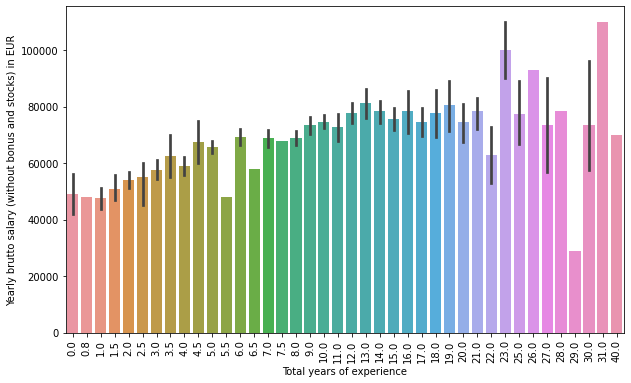

In [ ]:
selected_col = 'Total years of experience'
label_col = 'Yearly brutto salary (without bonus and stocks) in EUR'
replacing_value = data[selected_col].mode()[0]
data.fillna({'Total years of experience': replacing_value}, inplace = True)
order = sorted(list(set(data[selected_col])))
rotation = True
print(f'In {year}')
plot_barplot(data,selected_col,label_col,rotation,order)

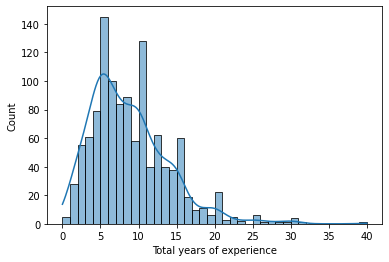

In [ ]:
sns.histplot(data['Total years of experience'], kde = True, bins = 40)

In [ ]:
data['Total years of experience']

0        5.0
1        7.0
2        4.0
3       17.0
4        5.0
        ... 
1162     9.0
1163    10.0
1164    15.0
1165     7.0
1166     2.0
Name: Total years of experience, Length: 1167, dtype: float64

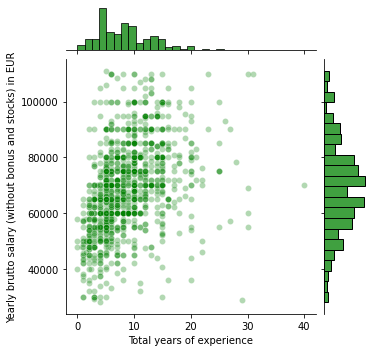

In [ ]:
# alternative visualization: scatterplot salary vs total years of salary
sns.jointplot(x=data['Total years of experience'], y=data['Yearly brutto salary (without bonus and stocks) in EUR'],
              height=5, color='green',
              joint_kws={'alpha' : 0.3},
             )
plt.show()

In [ ]:
total_responses = data['Total years of experience'].value_counts().sum()
exp_5y= data[data['Total years of experience'] >= 5]['Total years of experience'].value_counts().sum()
exp_10y = data[data['Total years of experience'] >= 10]['Total years of experience'].value_counts().sum()

In [ ]:
print(f'Group of respondents having over 5 years of experience takes {round(exp_5y/total_responses*100,2)}% of responses')

Group of respondents having over 5 years of experience takes 80.46% of responses


#### Data Cleaning for Years of experience in Germany

In [ ]:
data['Years of experience in Germany'].isnull().sum()

24

In [ ]:
replacing_value = data['Years of experience in Germany'].mode()[0]
data['Years of experience in Germany'] = data['Years of experience in Germany'].fillna(value = replacing_value)

In [ ]:
data['Years of experience in Germany'] = data['Years of experience in Germany'].replace(
    {'< 1': '1',
     '<1': '1',
     '6 (not as a data scientist, but as a lab scientist)':'6',
     '1,5' : '1.5',
     '2,5' : '2.5', 
     '0,5' : '0.5',
     '0,3' : '0.3',
     '4 month' : '0.3',
     '3 (in Poland)' : '0',
     '3,5' : '3.5',
     '1,7' : '1.7',
     '4,5' : '4.5',
     '4 (in Switzerland), 0 (in Germany)':'0',
     '3 months':'0.25',
     '⁰':'0',
     '-':'0',
     'less than year': '1',
     })
data['Years of experience in Germany'] = data['Years of experience in Germany'].astype('float')

In [ ]:
total_responses = data['Years of experience in Germany'].value_counts().sum()
non_exp = data[data['Years of experience in Germany'] == 0]['Years of experience in Germany'].value_counts().sum()
exp_5y = data[data['Years of experience in Germany'] >= 5]['Years of experience in Germany'].value_counts().sum()

In [ ]:
non_exp

84

In [ ]:
print(f'Group of respondents having over 5 years of experience in Germany takes {round(exp_5y/total_responses*100,2)}% of responses')

Group of respondents having over 5 years of experience in Germany takes 29.13% of responses


In 2020


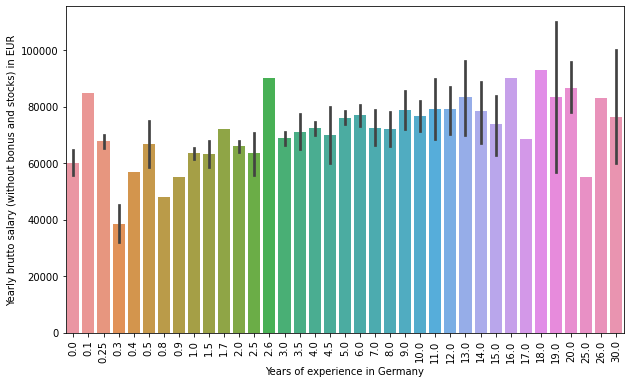

In [ ]:
selected_col = 'Years of experience in Germany'
label_col = 'Yearly brutto salary (without bonus and stocks) in EUR'
replacing_value = data[selected_col].mode()[0]
data.fillna({selected_col: replacing_value}, inplace = True)
order = sorted(list(set(data[selected_col])))
rotation = True
print(f'In {year}')
plot_barplot(data,selected_col,label_col,rotation,order)

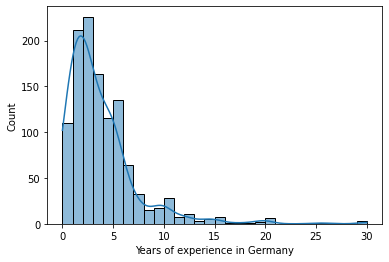

In [ ]:
sns.histplot(data['Years of experience in Germany'], kde = True, bins = 30)

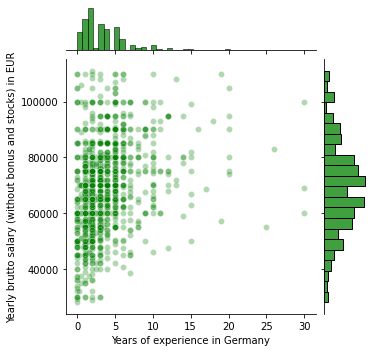

In [ ]:
# alternative visualization: scatterplot salary vs total years of salary
sns.jointplot(x=data['Years of experience in Germany'], y=data['Yearly brutto salary (without bonus and stocks) in EUR'],
              height=5, color='green',
              joint_kws={'alpha' : 0.3},
             )
plt.show()

#### Years of experience in Germany 

In [ ]:
df_exp = data.copy()
df_exp.loc[df_exp['Years of experience in Germany'] < 5, 'Years of experience in Germany'] = 1
df_exp.loc[(df_exp['Years of experience in Germany'] >= 5) & (df_exp['Years of experience in Germany'] < 10), 'Years of experience in Germany'] = 2
df_exp.loc[(df_exp['Years of experience in Germany'] >= 10), 'Years of experience in Germany'] = 3

Text(0, 0.5, '')

Text(0.5, 1.0, 'Years of experience in Germany')

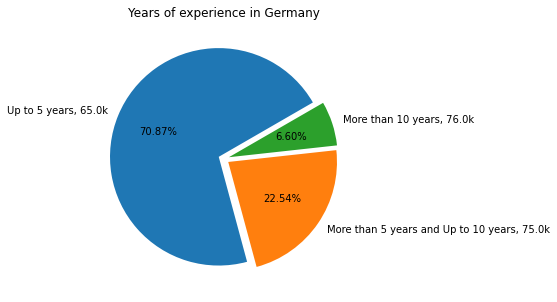

In [ ]:
list_exp = ['Up to 5 years', 'More than 5 years and Up to 10 years', 'More than 10 years']
exp_groups = list(df_exp['Years of experience in Germany'].value_counts().keys())
labels = []
for i,item in enumerate(exp_groups):
    median_salary = df_exp.groupby('Years of experience in Germany')['Yearly brutto salary (without bonus and stocks) in EUR'].median()[item]/1000
    labels.append(f'{list_exp[i]}, {median_salary}k')
df_exp.groupby('Years of experience in Germany').size().plot(kind='pie', 
                                            autopct='%.2f%%',
                                            startangle=30, 
                                            textprops={'fontsize': 10},
                                            figsize=(10,5),
                                            radius = 1,
                                            explode = [0.05]*3,
                                            labels = labels)
plt.ylabel('')
plt.title('Years of experience in Germany')

In 2020


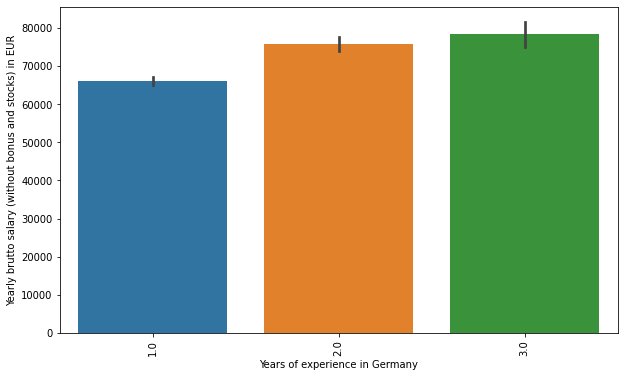

In [ ]:
selected_col = 'Years of experience in Germany'
label_col = 'Yearly brutto salary (without bonus and stocks) in EUR'
replacing_value = df_exp[selected_col].mode()[0]
df_exp.fillna({selected_col: replacing_value}, inplace = True)
order = sorted(list(set(df_exp[selected_col])))
rotation = True
print(f'In {year}')
plot_barplot(df_exp,selected_col,label_col,rotation,order)

### Salary vs Seniority Level

In [ ]:
data['Total salary with bonus and stocks'] = data[selected_col_1] + data[selected_col_3]
data['Total salary with bonus and stocks one year ago'] = data[selected_col_2] + data[selected_col_4]

####  Seniority Level vs Total years of experience 

In [ ]:
data['Seniority level'].isnull().sum()

11

In [ ]:
data['Seniority level'].value_counts()

Senior                 547
Middle                 347
Lead                   146
Junior                  70
Head                    34
Principal                3
No level                 1
VP                       1
Manager                  1
Work Center Manager      1
No level                 1
Director                 1
Key                      1
Entry level              1
Intern                   1
Name: Seniority level, dtype: int64

In [ ]:
replacing_value = data['Seniority level'].mode()[0]
data['Seniority level'] = data['Seniority level'].fillna(value = replacing_value)

Float64Index([ 5.0, 10.0,  6.0,  8.0,  7.0,  4.0, 12.0, 15.0,  3.0,  9.0,  2.0,
              11.0, 13.0, 14.0,  1.0, 20.0, 16.0, 18.0, 17.0, 19.0, 25.0, 22.0,
               1.5,  0.0,  2.5, 30.0, 21.0, 27.0,  4.5,  3.5, 23.0,  6.5,  7.5,
              28.0, 29.0, 26.0,  0.8,  5.5, 31.0, 40.0],
             dtype='float64')

<Figure size 1080x576 with 0 Axes>

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

Text(0.5, 0, '')

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 11 Text major ticklabel objects>)

Text(0, 0.5, 'Total years of experience')

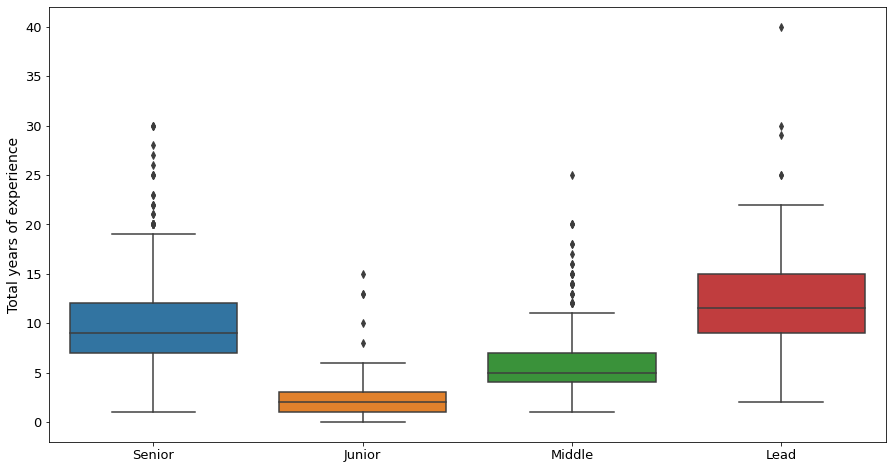

In [ ]:
total_experience = data.copy().dropna(subset=['Total years of experience'])
total_experience['Total years of experience'].value_counts().keys()
total_experience['Total years of experience'] = total_experience['Total years of experience'].astype(int) 

plt.figure(figsize=(15,8))
sns.boxplot(data=total_experience[total_experience['Seniority level'].isin(['Senior','Junior','Middle','Lead'])],
           x='Seniority level',y='Total years of experience')
plt.xticks(fontsize=13)
plt.xlabel("")
plt.yticks(fontsize=13)
plt.ylabel("Total years of experience",fontsize=14)
plt.show()

<Figure size 1080x576 with 0 Axes>

(array([ 20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 <a list of 6 Text major ticklabel objects>)

Text(0.5, 0, 'Yearly brutto salary (without bonus and stocks) in EUR')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

Text(0, 0.5, '')

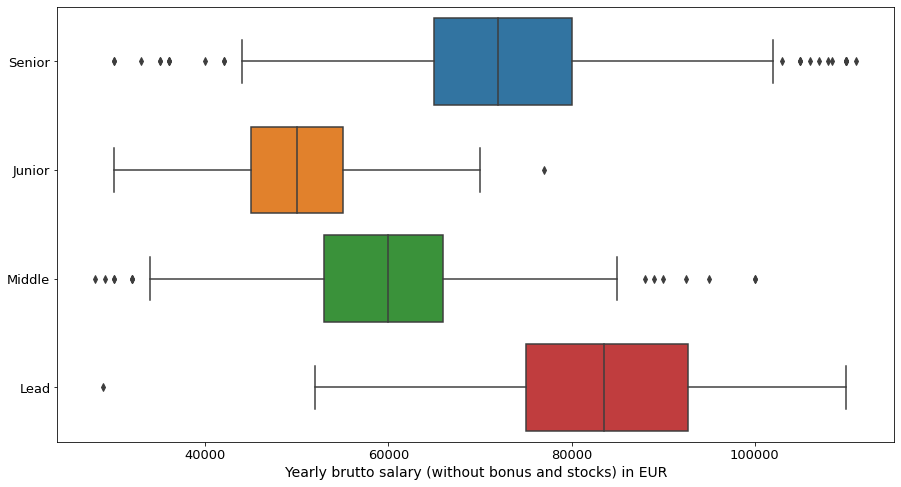

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=total_experience[total_experience['Seniority level'].isin(['Senior','Junior','Middle', 'Lead'])],
           y='Seniority level',x='Yearly brutto salary (without bonus and stocks) in EUR')
plt.xticks(fontsize=13)
plt.xlabel("Yearly brutto salary (without bonus and stocks) in EUR",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("")
plt.show()

In [ ]:
total_experience[total_experience['Seniority level'].isin(['Senior','Junior','Middle', 'Lead'])].groupby('Seniority level')['Yearly brutto salary (without bonus and stocks) in EUR',
                                                                                                                            'Total salary with bonus and stocks'].median()

,Yearly brutto salary (without bonus and stocks) in EUR,Total salary with bonus and stocks
Seniority level,,
Junior,50000.0,52750.0
Lead,83500.0,90000.0
Middle,60000.0,63000.0
Senior,72000.0,75000.0


### Salary vs Employment Status

In [ ]:
data['Employment status'].isnull().sum()

0

In [ ]:
replacing_value = data['Employment status'].mode()[0]
data['Employment status'] = data['Employment status'].fillna(value = replacing_value)

In [ ]:
data['Employment status'].value_counts()

Full-time employee                                                                 1142
Self-employed (freelancer)                                                           13
Part-time employee                                                                    5
Founder                                                                               3
Company Director                                                                      1
Full-time position, part-time position, & self-employed (freelancing, tutoring)       1
Intern                                                                                1
full-time, but 32 hours per week (it was my request, I'm a student)                   1
Name: Employment status, dtype: int64

<Figure size 1080x576 with 0 Axes>

(array([ 20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 <a list of 6 Text major ticklabel objects>)

Text(0.5, 0, 'Yearly brutto salary (without bonus and stocks) in EUR')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

Text(0, 0.5, '')

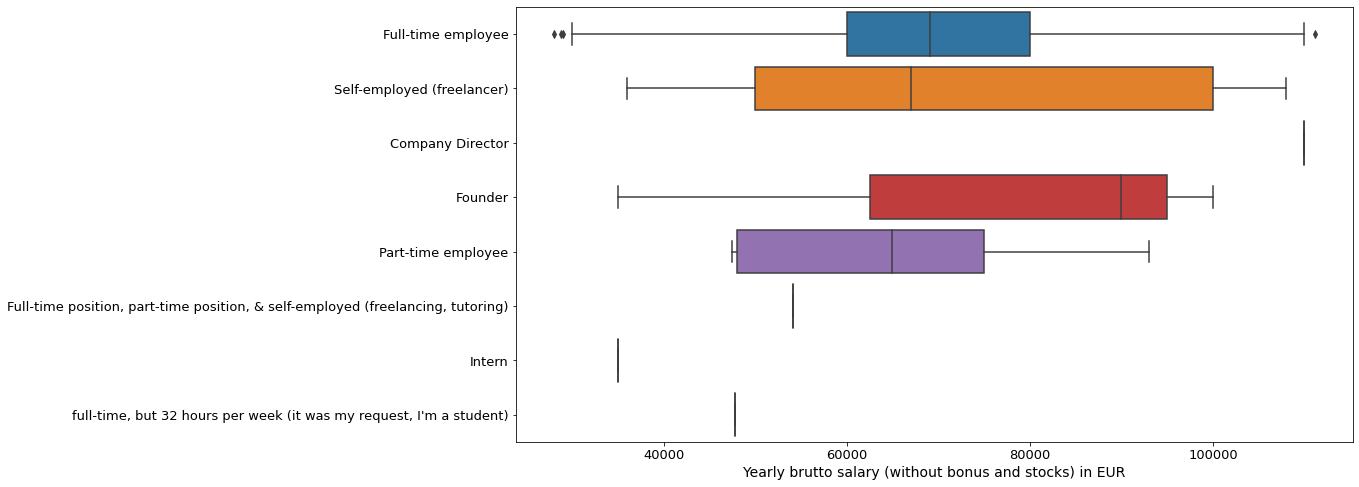

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data = data,
           y='Employment status',x='Yearly brutto salary (without bonus and stocks) in EUR')
plt.xticks(fontsize=13)
plt.xlabel("Yearly brutto salary (without bonus and stocks) in EUR",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("")
plt.show()

### Salary vs Contract Duration

In [ ]:
data['Сontract duration'].isnull().sum()

21

In [ ]:
replacing_value = data['Сontract duration'].mode()[0]
data['Сontract duration'] = data['Сontract duration'].fillna(value = replacing_value)

In [ ]:
data['Сontract duration'].value_counts()

Unlimited contract    1122
Temporary contract      45
Name: Сontract duration, dtype: int64

In [ ]:
data.groupby('Сontract duration')['Yearly brutto salary (without bonus and stocks) in EUR'].median()

Сontract duration
Temporary contract    57000.0
Unlimited contract    70000.0
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: float64

<Figure size 1080x576 with 0 Axes>

(array([ 20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 <a list of 6 Text major ticklabel objects>)

Text(0.5, 0, 'Yearly brutto salary (without bonus and stocks) in EUR')

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

Text(0, 0.5, '')

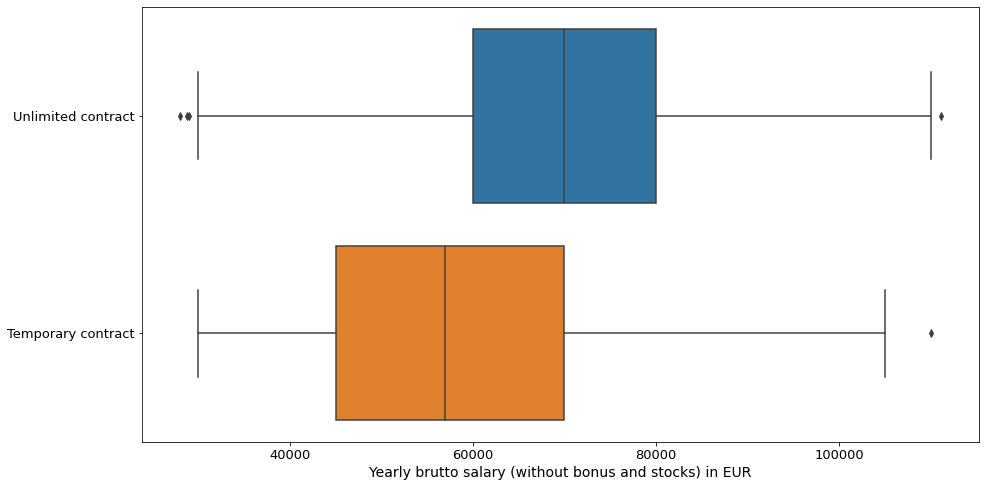

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data = data,
           y='Сontract duration',x='Yearly brutto salary (without bonus and stocks) in EUR')
plt.xticks(fontsize=13)
plt.xlabel("Yearly brutto salary (without bonus and stocks) in EUR",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("")
plt.show()

## 4.4. Technology

### Programming Language

#### Data Cleaning

In [ ]:
cleaned_data = data.copy()

In [ ]:
# Fill NA and delete redundant spaces + upper case
selected_col = 'Your main technology / programming language'
cleaned_data[selected_col] = cleaned_data[selected_col].fillna(value = "Not_Specified")
cleaned_data[selected_col] = cleaned_data[selected_col].apply(lambda x:x.strip().upper())
cleaned_data[selected_col] = cleaned_data[selected_col].replace({'GOOGLE CLOUD PLATFORM': 'GCP', 
                                    'GOLANG' : 'GO', 
                                    'JS': 'JAVASCRIPT',
                                    'CLOUD COMPUTING': 'CLOUD',
                                    'PYTHIN': 'PYTHON',
                                    'JAVA BACKEND': 'JAVA',
                                    'PYTHON (DJANGO)': 'PYTHON',
                                    'PYRHON': 'PYTHON',
                                    'NODSJS': 'NODEJS',
                                    'NODE' : 'NODEJS',
                                    'C# .NET':'C#, .NET',
                                    'JAVASCRIPT (REACT)': 'JAVASCRIPT',
                                    'PYTHON + SQL': 'PYTHON, SQL',
                                    'CLOUDS': 'CLOUD',
                                    'AWS HADOOP POSTGRE TYPESCRIPT': 'AWS, HADOOP, POSTGRE, TYPESCRIPT',
                                    '.NET CORE': '.NET'
                                    })
cleaned_data[selected_col] = cleaned_data[selected_col].apply(lambda x:x.split(","))

In [ ]:
def count_langs(cleaned_data, selected_col):
  # Seperate / in answer
  splitted_list = []
  for list_lang in cleaned_data[selected_col]:
    new_list = []
    for string in list_lang:
        string_list = string.split('/')
        new_list = [*new_list,*string_list]
    splitted_list.append(new_list)
  cleaned_data[selected_col] = splitted_list

  # Remove redundent spaces in answer
  splitted_list = []
  for list_lang in cleaned_data[selected_col]:
    new_list = []
    for word in list_lang:
        word = word.strip()
        new_list = [*new_list, word]
    splitted_list.append(new_list)

  # Get a total list to count items
  cleaned_data[selected_col] = splitted_list
  ans_list = []
  for str_list in cleaned_data[selected_col]:
    ans_list = [*ans_list,*str_list]

  # Create a df for count and percentage
  df_count_lang = pd.DataFrame.from_dict(Counter(ans_list), orient='index', columns = ['Count'])
  df_count_lang = df_count_lang.sort_values(by = 'Count', ascending = False)
  df_count_lang['Percentage'] = round(df_count_lang['Count']/df_count_lang['Count'].sum()*100, 2)
  df_count_lang = df_count_lang.drop('NOT_SPECIFIED')

  return df_count_lang

In [ ]:
df_count_lang = count_langs(cleaned_data, selected_col)

([<matplotlib.axis.YTick at 0x7f99480302d0>,
 [Text(0, 0, 'PYTHON  16.49%'),
  Text(0, 0, 'JAVA  15.58%'),
  Text(0, 0, 'JAVASCRIPT  8.05%'),
  Text(0, 0, 'PHP  5.40%'),
  Text(0, 0, 'C++  3.72%'),
  Text(0, 0, 'TYPESCRIPT  3.57%'),
  Text(0, 0, 'C#  2.74%'),
  Text(0, 0, 'KOTLIN  2.51%'),
  Text(0, 0, 'GO  2.20%'),
  Text(0, 0, 'SWIFT  2.20%'),
  Text(0, 0, 'SCALA  2.13%'),
  Text(0, 0, 'SQL  2.05%'),
  Text(0, 0, '.NET  1.75%'),
  Text(0, 0, 'RUBY  1.37%'),
  Text(0, 0, 'C  1.06%'),
  Text(0, 0, 'IOS  0.84%'),
  Text(0, 0, 'ANGULAR  0.84%'),
  Text(0, 0, 'AWS  0.76%'),
  Text(0, 0, 'ANDROID  0.76%'),
  Text(0, 0, 'R  0.68%')])

Text(0, 0.5, '')

Text(0.5, 0, 'Number of responses')

Text(0.5, 1.0, 'The Most Popular Programming Language')

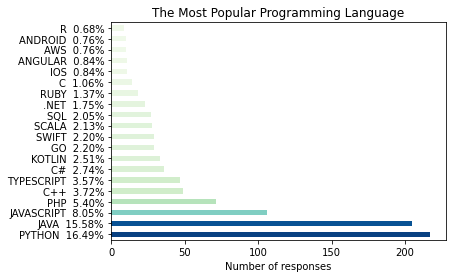

In [ ]:
top_n = 20
data_x = df_count_lang.sort_values(by = 'Count', ascending = False).head(top_n)
data_hight = df_count_lang['Percentage'].head(top_n)

data_hight_normalized = [x / max(data_hight) for x in data_hight]
my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_hight_normalized)
data_x['Count'].plot(kind = 'barh', color = colors)

langs = list(data_x.index)
percent = data_x['Percentage']
new_labels =  [i+'  {:.2f}%'.format(j) for i, j in zip(langs, percent)]
plt.yticks(range(len(data_x.index)), new_labels)
plt.ylabel("")
plt.xlabel("Number of responses")
plt.title('The Most Popular Programming Language')
plt.show()

#### Salary vs Programming Language

In [ ]:
data = cleaned_data.copy()

In [ ]:
selected_col = 'Your main technology / programming language'
label_col = 'Yearly brutto salary (without bonus and stocks) in EUR'
df_salary_on_tech = data[[selected_col, label_col]]
salary_df = pd.DataFrame(columns = [selected_col, label_col])
for i,items in enumerate(df_salary_on_tech[selected_col]):
  for item in items:
      salary_df = salary_df.append({
          selected_col: item,
          label_col: df_salary_on_tech[label_col][i]
      }, ignore_index = True)
salary_df = salary_df[~(salary_df[selected_col] == 'NOT_SPECIFIED')].reset_index(drop = True)

In [ ]:
# Top_20
salary_df[salary_df[selected_col].isin(langs)].sort_values(by= selected_col).groupby(selected_col).median()

,Yearly brutto salary (without bonus and stocks) in EUR
Your main technology / programming language,
.NET,65000.0
ANDROID,69000.0
ANGULAR,71000.0
AWS,74000.0
C,70000.0
C#,64500.0
C++,71000.0
GO,75000.0
IOS,65000.0


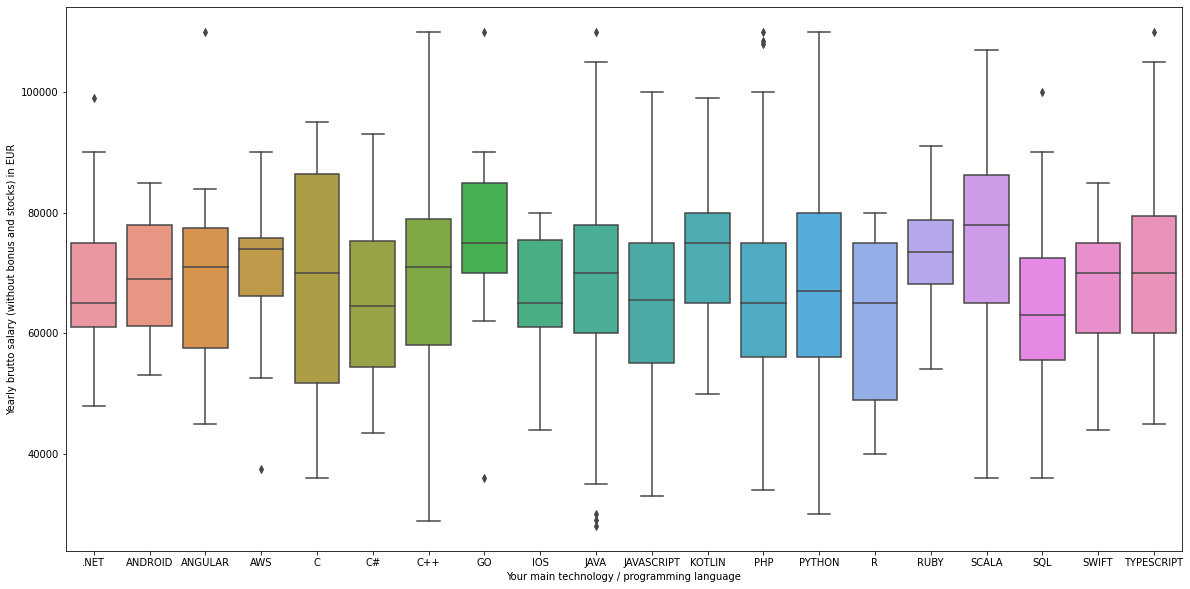

In [ ]:
salary_df_top_n_popular = salary_df[salary_df[selected_col].isin(langs)].sort_values(by = selected_col)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.boxplot(x=selected_col, y=label_col, data=salary_df_top_n_popular)

In [ ]:
data = cleaned_data.copy()

### Supplementary technologies

In [ ]:
cleaned_data = data.copy()

In [ ]:
# Fill NA and delete redundant spaces + upper case
selected_col = 'Other technologies/programming languages you use often'
cleaned_data[selected_col] = cleaned_data[selected_col].fillna(value = "Not_Specified")
cleaned_data[selected_col] = cleaned_data[selected_col].apply(lambda x:x.strip().upper())
cleaned_data[selected_col] = cleaned_data[selected_col].replace({'GOOGLE CLOUD PLATFORM': 'GCP', 
                                    'GOLANG' : 'GO', 
                                    'JS': 'JAVASCRIPT',
                                    'CLOUD COMPUTING': 'CLOUD',
                                    'PYTHIN': 'PYTHON',
                                    'JAVA BACKEND': 'JAVA',
                                    'PYTHON (DJANGO)': 'PYTHON',
                                    'PYRHON': 'PYTHON',
                                    'NODSJS': 'NODEJS',
                                    'NODE' : 'NODEJS',
                                    'C# .NET':'C#, .NET',
                                    'JAVASCRIPT (REACT)': 'JAVASCRIPT',
                                    'PYTHON + SQL': 'PYTHON, SQL',
                                    'CLOUDS': 'CLOUD',
                                    'AWS HADOOP POSTGRE TYPESCRIPT': 'AWS, HADOOP, POSTGRE, TYPESCRIPT'
                                    })
cleaned_data[selected_col] = cleaned_data[selected_col].apply(lambda x:x.split(","))

In [ ]:
# Seperate / in answer
splitted_list = []
for list_lang in cleaned_data[selected_col]:
  new_list = []
  for string in list_lang:
      string_list = string.split('/')
      new_list = [*new_list,*string_list]
  splitted_list.append(new_list)
cleaned_data[selected_col] = splitted_list

# Seperate ; in answer
splitted_list = []
for list_lang in cleaned_data[selected_col]:
  new_list = []
  for string in list_lang:
      string_list = string.split(';')
      new_list = [*new_list,*string_list]
  splitted_list.append(new_list)
cleaned_data[selected_col] = splitted_list

# Remove redundent spaces in answer
splitted_list = []
for list_lang in cleaned_data[selected_col]:
  new_list = []
  for word in list_lang:
      word = word.strip()
      new_list = [*new_list, word]
  splitted_list.append(new_list)

# Get a total list to count items
cleaned_data[selected_col] = splitted_list
ans_list = []
for str_list in cleaned_data[selected_col]:
  ans_list = [*ans_list,*str_list]

# Create a df for count and percentage
df_count_lang = pd.DataFrame.from_dict(Counter(ans_list), orient='index', columns = ['Count'])
df_count_lang = df_count_lang.sort_values(by = 'Count', ascending = False)
df_count_lang['Percentage'] = round(df_count_lang['Count']/df_count_lang['Count'].sum()*100, 2)
df_count_lang = df_count_lang.drop('NOT_SPECIFIED')


([<matplotlib.axis.YTick at 0x7f9947cb7310>,
 [Text(0, 0, 'DOCKER  11.42%'),
  Text(0, 0, 'SQL  10.45%'),
  Text(0, 0, 'AWS  8.81%'),
  Text(0, 0, 'PYTHON  8.81%'),
  Text(0, 0, 'TYPESCRIPT  8.28%'),
  Text(0, 0, 'JAVASCRIPT  8.28%'),
  Text(0, 0, 'KUBERNETES  6.48%'),
  Text(0, 0, 'JAVA  4.85%'),
  Text(0, 0, 'SCALA  4.85%'),
  Text(0, 0, 'GOOGLE CLOUD  3.24%'),
  Text(0, 0, 'KOTLIN  2.66%'),
  Text(0, 0, 'GO  2.42%'),
  Text(0, 0, 'C++  2.10%'),
  Text(0, 0, 'C  2.10%'),
  Text(0, 0, '.NET  1.87%'),
  Text(0, 0, 'AZURE  1.77%'),
  Text(0, 0, 'PHP  1.77%'),
  Text(0, 0, 'R  0.93%'),
  Text(0, 0, 'RUBY  0.89%'),
  Text(0, 0, 'SWIFT  0.77%')])

Text(0, 0.5, '')

Text(0.5, 0, 'Number of responses')

Text(0.5, 1.0, 'The Most Popular Supplementary Technologies')

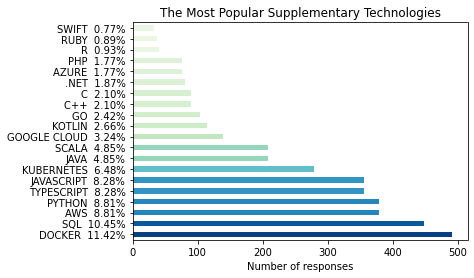

In [ ]:
top_n = 20
data_x = df_count_lang.sort_values(by = 'Count', ascending = False).head(top_n)
data_hight = df_count_lang['Percentage'].head(top_n)

data_hight_normalized = [x / max(data_hight) for x in data_hight]
my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_hight_normalized)
data_x['Count'].plot(kind = 'barh', color = colors)

langs = list(data_x.index)
percent = data_x['Percentage']
new_labels =  [i+'  {:.2f}%'.format(j) for i, j in zip(langs, percent)]
plt.yticks(range(len(data_x.index)), new_labels)
plt.ylabel("")
plt.xlabel("Number of responses")
plt.title('The Most Popular Supplementary Technologies')
plt.show()

In [ ]:
data = cleaned_data.copy()

## Position and their main programming language

### Software Engineer

In [ ]:
# Software Engineer and Main Programming Language
se_raw_pro = data[data['Position'] == 'SOFTWARE ENGINEER']
df_count_lang = count_langs(se_raw_pro, 'Your main technology / programming language')
df_count_lang.head(10)

,Count,Percentage
JAVA,91,22.36
C++,41,10.07
PYTHON,33,8.11
PHP,32,7.86
JAVASCRIPT,32,7.86
C#,26,6.39
.NET,18,4.42
TYPESCRIPT,17,4.18
SCALA,15,3.69
GO,13,3.19


<Figure size 864x576 with 0 Axes>

Text(-0.10000000000000003, 91.3, '91')

Text(0.8999999999999999, 41.3, '41')

Text(1.9000000000000001, 33.3, '33')

Text(2.9, 32.3, '32')

Text(3.9, 32.3, '32')

Text(4.8999999999999995, 26.3, '26')

Text(5.8999999999999995, 18.3, '18')

Text(6.8999999999999995, 17.3, '17')

Text(7.8999999999999995, 15.3, '15')

Text(8.9, 13.3, '13')

Text(0.5, 0, 'Technology/ Programming Language for Software Engineer')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

Text(0, 0.5, 'Count')

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

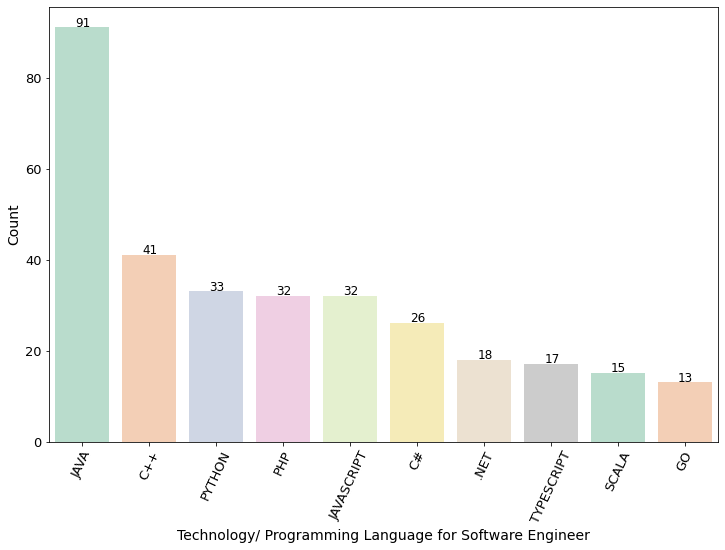

In [ ]:
# Top 10 Programming Language for Software Engineer
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df_count_lang.head(10), x=df_count_lang.head(10).index,
            y=df_count_lang.head(10)['Count'].iloc[:10], palette = 'Pastel2')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+0.3, p.get_height()+0.3), fontsize=12)

plt.xlabel("Technology/ Programming Language for Software Engineer",fontsize=14)
plt.xticks(fontsize=13,rotation=65)
plt.ylabel("Count",fontsize=14)
plt.yticks(fontsize=13)
plt.show()

### Data Scientist

In [ ]:
# Software Engineer and Main Programming Language
ds_raw_pro = data[data['Position'] == 'DATA SCIENTIST']
df_count_lang = count_langs(ds_raw_pro, 'Your main technology / programming language')
df_count_lang.head(10)

,Count,Percentage
PYTHON,87,75.65
SQL,7,6.09
R,5,4.35
SPARK,2,1.74
ML,1,0.87
SEVERAL,1,0.87
STATISTICS,1,0.87
BQ,1,0.87
TABLEAU,1,0.87
GTM,1,0.87


<Figure size 864x576 with 0 Axes>

Text(-0.10000000000000003, 87.3, '87')

Text(0.8999999999999999, 7.3, '7')

Text(1.9000000000000001, 5.3, '5')

Text(2.9, 2.3, '2')

Text(3.9, 1.3, '1')

Text(4.8999999999999995, 1.3, '1')

Text(5.8999999999999995, 1.3, '1')

Text(6.8999999999999995, 1.3, '1')

Text(7.8999999999999995, 1.3, '1')

Text(8.9, 1.3, '1')

Text(0.5, 0, 'Technology/ Programming Language for Data Scientist')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

Text(0, 0.5, 'Count')

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

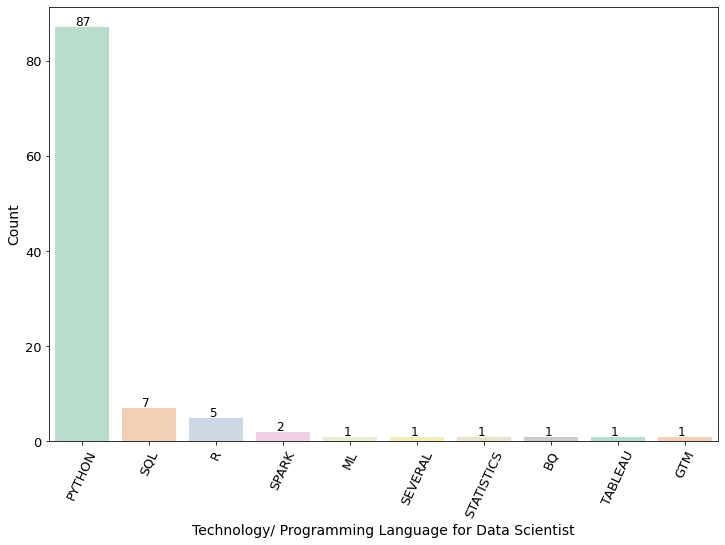

In [ ]:
# Top 10 Programming Language for Data Scientist
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df_count_lang.head(10), x=df_count_lang.head(10).index,
            y=df_count_lang.head(10)['Count'].iloc[:10], palette = 'Pastel2')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+0.3, p.get_height()+0.3), fontsize=12)

plt.xlabel("Technology/ Programming Language for Data Scientist",fontsize=14)
plt.xticks(fontsize=13,rotation=65)
plt.ylabel("Count",fontsize=14)
plt.yticks(fontsize=13)
plt.show()

## **4.5. Effected by COVID-19 Pandemic?**

## Losing a job due to COVID-19?

In [ ]:
selected_col = 'Have you lost your job due to the coronavirus outbreak?'
data[selected_col].value_counts()

No                                                                                        1092
Yes                                                                                         51
i didn't but will be looking for new one because of covid                                    1
kurzarbeitzeit for 1.5 months                                                                1
Have been a freelancer at the beginning of year                                              1
No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months       1
Lost the job but for different reason                                                        1
Leads and project inquiries have slowed down                                                 1
yes but found a new one with better pay / perks                                              1
Name: Have you lost your job due to the coronavirus outbreak?, dtype: int64

In [ ]:
answers = list(data[selected_col].value_counts().keys())
popular_answers = ['No','Yes']
other_answers = set(answers) - set(popular_answers)
for item in other_answers:
  data[selected_col].loc[data[selected_col]==item] = 'Others'

In [ ]:
data[selected_col].isnull().sum()

17

In [ ]:
data[selected_col] = data[selected_col].fillna(value = 'Others')

In [ ]:
data[selected_col].value_counts()

No        1092
Yes         51
Others      24
Name: Have you lost your job due to the coronavirus outbreak?, dtype: int64

Text(0, 0.5, '')

Text(0.5, 1.0, 'Losing a job due to COVID-19?')

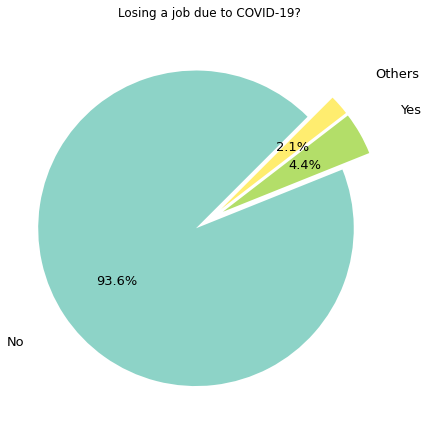

In [ ]:
data[selected_col].value_counts().plot.pie(y=selected_col, autopct='%1.1f%%', figsize=(8,6), fontsize=13,cmap='Set3',
                     startangle=45, explode =[0.1]*3, labeldistance=1.3,
                    textprops={'fontsize': 15})
plt.ylabel("")
plt.title("Losing a job due to COVID-19?")
plt.tight_layout()
plt.show()

### Gender

In [ ]:
selected_col = 'Gender'
label_col = 'Have you lost your job due to the coronavirus outbreak?'
df_effected = data[data[label_col] == 'Yes']
df_effected.groupby(selected_col)[label_col].count()

Gender
Female    12
Male      39
Name: Have you lost your job due to the coronavirus outbreak?, dtype: int64

In [ ]:
data['Gender'].value_counts()

Male             976
Female           183
Not Specified      8
Name: Gender, dtype: int64

In [ ]:
Percentage_job_lost_female = round(df_effected.groupby(selected_col)[label_col].count()['Female']/data['Gender'].value_counts()['Female']*100,2)
Percentage_job_lost_male = round(df_effected.groupby(selected_col)[label_col].count()['Male']/data['Gender'].value_counts()['Male']*100,2)
Percentage_job_lost_female

6.56

In [ ]:
Percentage_job_lost_male

4.0

### Age

In [ ]:
selected_col = 'Age'
label_col = 'Have you lost your job due to the coronavirus outbreak?'
df_effected = data[data[label_col] == 'Yes']
df_effected.groupby(selected_col)[label_col].count()
for group in df_effected['Age'].unique():
  percentage_lost = round(df_effected.groupby(selected_col)[label_col].count()[group]/data[selected_col].value_counts()[group]*100,2)
  print('Percentage lost job for group {group}:', percentage_lost)

Age
1    17
2    26
3     8
Name: Have you lost your job due to the coronavirus outbreak?, dtype: int64

Percentage lost job for group {group}: 3.68
Percentage lost job for group {group}: 4.89
Percentage lost job for group {group}: 7.84


## Having shorter working week (Kurzarbeit)?

In [ ]:
selected_col = 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week'
data[selected_col].unique()

array([ nan,  0. , 30. , 32. , 24. , 20. , 40. , 10. , 34. , 38. , 35. ,
       36. , 28. , 39. , 37.5,  8. , 15. , 25. , 26. ,  2. ,  4. ,  5. ,
       16. , 12. ])

In [ ]:
percentage_no_responses = data[selected_col].isna().sum() / data[selected_col].shape[0] * 100
percentage_no_responses

70.26563838903171

==> This means that around 70 percent of the workers don't have a shorter working week. 

Around 30 percent of respondents have a shorter working week during the COVID-19 outbreak:

In [ ]:
adjusted_wh = data[selected_col].value_counts()
print(f'There are {adjusted_wh.sum()} respondents have a shorter working week:')
print("Zero working hours per week: ", round(adjusted_wh.iloc[0] / adjusted_wh.sum() * 100,2) , '%')
print("Greater than 10 hours per weel: ", round(adjusted_wh[adjusted_wh.index > 10].sum() / adjusted_wh.sum() * 100,2), '%')

There are 347 respondents have a shorter working week:
Zero working hours per week:  51.3 %
Greater than 10 hours per weel:  43.52 %


===> For those with adjusted working hours, approximately 51.3%  of the respondents (179) don't have working hours per week. Around 43.52% of the employee still have greater than 10 working hours per week.

## Monetary Support from Employer during COVID-19?

In [ ]:
selected_col = 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'
data[selected_col].value_counts()

0                                                          146
500                                                         47
No                                                          29
1000                                                        22
600                                                         19
1500                                                        19
300                                                         17
200                                                         16
700                                                         13
400                                                         12
no                                                           7
250                                                          7
800                                                          6
1100                                                         4
40                                                           4
100                                                    

In [ ]:
# NaN value counts
print('Count of no response:', data[selected_col].isna().sum())
# Count of responses
print('Count of responses:', data[selected_col].value_counts().sum())


Count of no response: 741
Count of responses: 426


Although it seems reasonable to assume that NaN responses mean No monetary support. So for this feature, I will combine those who answer '0' and No (ignore case) together. I will be looking at the proportion of those who get some support vs. those that received nothing.

Text(0.5, 1.0, 'Counting NaN value as No')

([<matplotlib.patches.Wedge at 0x7f9949878750>,
 [Text(-0.9107047555605301, -0.7022227909997192, 'Support'),
  Text(0.9107047884339505, 0.7022227483665519, 'No Support')],
 [Text(-0.5147461661863865, -0.3969085340433195, '20.9%'),
  Text(0.5147461847670155, 0.3969085099463119, '79.1%')])

Text(0.5, 0, 'Monetary Support from Employer during COVID-19?')

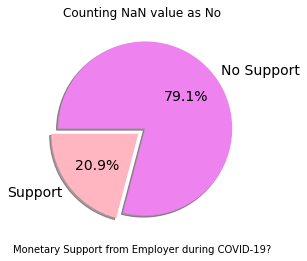

In [ ]:
support_res = data[selected_col].value_counts()
num_no_support = support_res["0"] + support_res["No"] + support_res["no"]
num_support = data[selected_col].value_counts().sum() - num_no_support


labels = ['Support','No Support']
values = [num_support, num_no_support]
# Assuming that NaN means "No monetary support"
plt.title("Counting NaN value as No",fontsize=12)
plt.pie([num_support,num_no_support + data[selected_col].isna().sum()],labels=labels,autopct='%1.1f%%',startangle=180,explode=[0.05] * 2,
       colors=['lightpink','violet'],textprops={'fontsize': 14},shadow=True)
plt.xlabel('Monetary Support from Employer during COVID-19?')
plt.show()

# **5. Hypothesis Testing** 

In [ ]:
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

### Diffence in salary of genders

In [ ]:
selected_col = 'Gender'
label_col = 'Yearly brutto salary (without bonus and stocks) in EUR'

In [ ]:
df_test = data[[selected_col,label_col]]
df_male = df_test[df_test['Gender'] == 'Male']
df_female = df_test[df_test['Gender'] == 'Female']

In [ ]:
#H0: Male have mean salary same as female in 2020
#Ha: Mean salary of male is diferrent from mean salary of female in 2020
stats.ttest_ind(df_male[label_col], df_female[label_col], equal_var = False)

Ttest_indResult(statistic=10.176558004799789, pvalue=4.933048866828901e-21)

===> p-value is very small (< 0.05) then we reject the null hypothesis.

### Difference in salary between top 3 citites

In [ ]:
top_3_cities = list(data['City'].value_counts().head(3).keys())
top_3_cities

['BERLIN', 'MUNICH', 'FRANKFURT']

In [ ]:
selected_col = 'City'
label_col = 'Yearly brutto salary (without bonus and stocks) in EUR'
df_test = data[[selected_col,label_col]]

In [ ]:
df_Berlin = df_test[df_test['City'] == 'BERLIN']
df_Munich = df_test[df_test['City'] == 'MUNICH']
df_Frankfurt = df_test[df_test['City'] == 'FRANKFURT']

In [ ]:
#H0: Respondents work in these 3 cities have same mean of salary in 2020
#Ha: At least 2 out of these 3 cities have different means of salary in 2020
f_oneway(df_Berlin[label_col], df_Munich[label_col], df_Frankfurt[label_col])

F_onewayResult(statistic=3.2106854258150195, pvalue=0.040788264761083264)

===> p-value is small (< 0.05) then we reject the null hypothesis.

### Test binomial (lost job/ not lost) between genders, cities, positions

In [ ]:
selected_cols = ['Gender','Have you lost your job due to the coronavirus outbreak?']
df_test = data[selected_cols]

In [ ]:
df_test

,Gender,Have you lost your job due to the coronavirus outbreak?
0,Male,No
1,Male,No
2,Male,No
3,Male,No
4,Male,No
...,...,...
1162,Male,Yes
1163,Male,No
1164,Male,No
1165,Male,No


In [ ]:
df_male = df_test[df_test['Gender'] == 'Male']
df_male.value_counts()

Gender  Have you lost your job due to the coronavirus outbreak?
Male    No                                                         919
        Yes                                                         39
        Others                                                      18
dtype: int64

In [ ]:
# Claims that no more than 4% of male lost their jobs due to Covid-19

In [ ]:
from scipy import stats
stats.binom_test(39, n=976, p=0.04, alternative='greater')

0.5252018317822352

# **6. Predict yearly salary**

## Without salary one year ago

In [ ]:
feature_cols  = ['Age', 'Gender', 'City', 'Position',
                 'Total years of experience','Years of experience in Germany','Seniority level',
                 'Main language at work', 'Сontract duration', 'Your main technology / programming language',
                 'Company size', 'Company type', 'Employment status', 'Yearly brutto salary (without bonus and stocks) in EUR']

In [ ]:
df = data[feature_cols]
df.head()

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Main language at work,Сontract duration,Your main technology / programming language,Company size,Company type,Employment status,Yearly brutto salary (without bonus and stocks) in EUR
0,1,Male,MUNICH,SOFTWARE ENGINEER,5.0,3.0,Senior,English,Unlimited contract,[TYPESCRIPT],3,Product,Full-time employee,80000.0
1,1,Male,BERLIN,BACKEND DEVELOPER,7.0,4.0,Senior,English,Unlimited contract,[RUBY],4,Product,Full-time employee,80000.0
2,1,Male,BERLIN,FRONTEND DEVELOPER,4.0,1.0,Junior,English,Unlimited contract,[JAVASCRIPT],3,Startup,Full-time employee,54000.0
3,2,Male,BERLIN,BACKEND DEVELOPER,17.0,6.0,Senior,English,Unlimited contract,"[C#, .NET]",4,Product,Full-time employee,62000.0
4,2,Male,BERLIN,DEVOPS,5.0,1.0,Senior,English,Unlimited contract,"[AWS, GCP, PYTHON, K8S]",2,Startup,Full-time employee,76000.0


In [ ]:
df = df.rename(columns ={'Yearly brutto salary (without bonus and stocks) in EUR': 'Gross Salary'})

In [ ]:
categorical_columns = list(df.select_dtypes(include = 'object').columns)
print("\nCategorical variables: ", categorical_columns)
numerical_columns = list(df.select_dtypes(include = 'number').columns)
print("\nNumerical variables: ", numerical_columns)


Categorical variables:  ['Gender', 'City', 'Position', 'Seniority level', 'Main language at work', 'Сontract duration', 'Your main technology / programming language', 'Company size', 'Company type', 'Employment status']

Numerical variables:  ['Age', 'Total years of experience', 'Years of experience in Germany', 'Gross Salary']


### Check missing values

In [ ]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'miss_rate' :df_na})
missing_data

,miss_rate
Company size,1.199657


In [ ]:
df['Сontract duration'] = df['Сontract duration'].fillna(value = 'Unlimited contract')
df = df.dropna(subset = ['Company size'])
df['Main language at work'] = df['Main language at work'].fillna(value = 'English')
df['Employment status'] = df['Employment status'].fillna(value = 'Full-time employee')
df['Seniority level'] = df['Seniority level'].fillna(value = 'Middle')

In [ ]:
df.describe()

,Age,Total years of experience,Years of experience in Germany,Gross Salary
count,1153.000000,1153.000000,1153.000000,1153.000000
mean,1.810061,8.707979,3.672246,69127.190919
std,0.621800,5.152843,3.570309,15749.458557
min,1.000000,0.000000,0.000000,28000.000000
25%,1.000000,5.000000,1.500000,60000.000000
50%,2.000000,8.000000,3.000000,69000.000000
75%,2.000000,12.000000,5.000000,80000.000000
max,4.000000,40.000000,30.000000,110000.000000


In [ ]:
df.columns

Index(['Age', 'Gender', 'City', 'Position', 'Total years of experience',
       'Years of experience in Germany', 'Seniority level',
       'Main language at work', 'Сontract duration',
       'Your main technology / programming language', 'Company size',
       'Company type', 'Employment status', 'Gross Salary'],
      dtype='object')

In [ ]:
df = df.reset_index(drop = True)

### Change 'Your main technology / programming language'

In [ ]:
new_df = pd.DataFrame(columns = list(df.columns))
feature = 'Your main technology / programming language'
for i, items in enumerate(df[feature]):
  for item in items:
    new_df = new_df.append(df.loc[i], ignore_index=True)

In [ ]:
list_pro_langs = []
for items in df[feature]:
  for item in items:
    list_pro_langs.append(item)
new_df[feature] = list_pro_langs

### Label Encoding

In [ ]:
categorical_columns

['Gender',
 'City',
 'Position',
 'Seniority level',
 'Main language at work',
 'Сontract duration',
 'Your main technology / programming language',
 'Company size',
 'Company type',
 'Employment status']

In [ ]:
for column in categorical_columns:
  new_df[column] = new_df[column].astype('category')
  new_df[f'{column}_cat'] = new_df[column].cat.codes
new_df.head()

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Main language at work,Сontract duration,Your main technology / programming language,Company size,Company type,Employment status,Gross Salary,Gender_cat,City_cat,Position_cat,Seniority level_cat,Main language at work_cat,Сontract duration_cat,Your main technology / programming language_cat,Company size_cat,Company type_cat,Employment status_cat
0,1,Male,MUNICH,SOFTWARE ENGINEER,5.0,3.0,Senior,English,Unlimited contract,TYPESCRIPT,3,Product,Full-time employee,80000.0,1,58,71,12,2,1,138,2,2,2
1,1,Male,BERLIN,BACKEND DEVELOPER,7.0,4.0,Senior,English,Unlimited contract,RUBY,4,Product,Full-time employee,80000.0,1,4,6,12,2,1,117,3,2,2
2,1,Male,BERLIN,FRONTEND DEVELOPER,4.0,1.0,Junior,English,Unlimited contract,JAVASCRIPT,3,Startup,Full-time employee,54000.0,1,4,29,4,2,1,64,2,3,2
3,2,Male,BERLIN,BACKEND DEVELOPER,17.0,6.0,Senior,English,Unlimited contract,C#,4,Product,Full-time employee,62000.0,1,4,6,12,2,1,23,3,2,2
4,2,Male,BERLIN,BACKEND DEVELOPER,17.0,6.0,Senior,English,Unlimited contract,.NET,4,Product,Full-time employee,62000.0,1,4,6,12,2,1,3,3,2,2


In [ ]:
new_cat_cols = [f'{column}_cat' for column in categorical_columns]
new_cat_cols

['Gender_cat',
 'City_cat',
 'Position_cat',
 'Seniority level_cat',
 'Main language at work_cat',
 'Сontract duration_cat',
 'Your main technology / programming language_cat',
 'Company size_cat',
 'Company type_cat',
 'Employment status_cat']

In [ ]:
new_data = new_df[[*numerical_columns,*new_cat_cols]]
new_data

,Age,Total years of experience,Years of experience in Germany,Gross Salary,Gender_cat,City_cat,Position_cat,Seniority level_cat,Main language at work_cat,Сontract duration_cat,Your main technology / programming language_cat,Company size_cat,Company type_cat,Employment status_cat
0,1,5.0,3.0,80000.0,1,58,71,12,2,1,138,2,2,2
1,1,7.0,4.0,80000.0,1,4,6,12,2,1,117,3,2,2
2,1,4.0,1.0,54000.0,1,4,29,4,2,1,64,2,3,2
3,2,17.0,6.0,62000.0,1,4,6,12,2,1,23,3,2,2
4,2,17.0,6.0,62000.0,1,4,6,12,2,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,2,9.0,5.0,70000.0,1,4,6,12,2,1,62,2,2,2
1298,2,10.0,1.5,60000.0,1,4,15,12,2,1,31,4,2,2
1299,2,15.0,2.0,110000.0,1,58,38,6,2,1,97,3,1,2
1300,1,7.0,7.0,38350.0,1,69,29,8,5,1,64,3,2,2


### Check correlated variables

In [ ]:
df = new_data.copy()

In [ ]:
# plt.figure(figsize=(20,15))
# ax = sns.pairplot(df, size=4)

# ax.fig.set_figwidth(15)
# ax.fig.set_figheight(10)

### Correlation Matrix

<Figure size 1152x360 with 0 Axes>

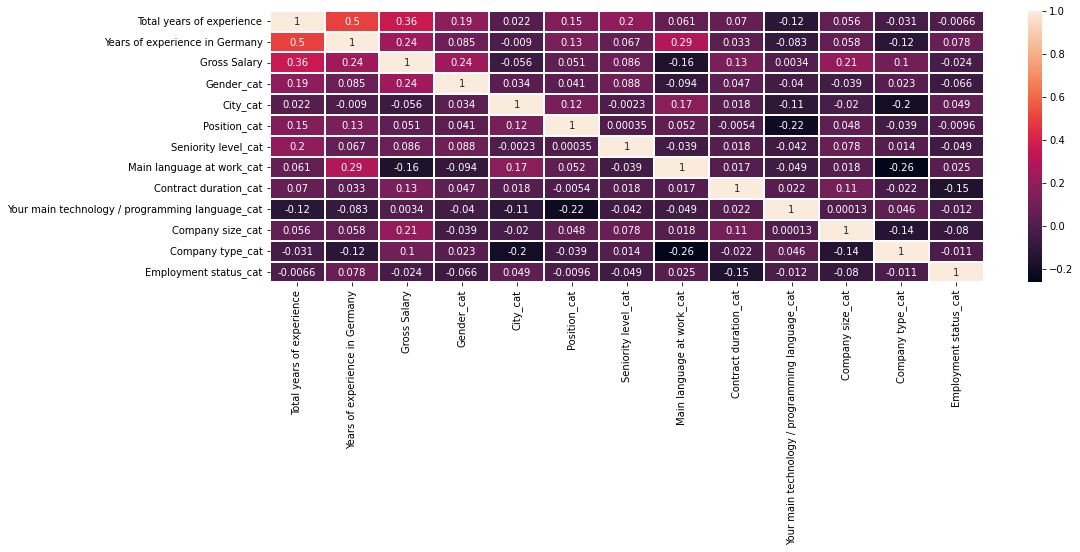

In [ ]:
## Check correlation to see if we have multicollinearity
plt.figure(figsize = (16,5))
ax = sns.heatmap(df.corr(), linewidth=1, annot=True,linewidths=.5)

### Feature Scaling

In [ ]:
for col in new_cat_cols:
  df[col] = df[col].astype('str')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Age                                              1302 non-null   object 
 1   Total years of experience                        1302 non-null   float64
 2   Years of experience in Germany                   1302 non-null   float64
 3   Gross Salary                                     1302 non-null   float64
 4   Gender_cat                                       1302 non-null   object 
 5   City_cat                                         1302 non-null   object 
 6   Position_cat                                     1302 non-null   object 
 7   Seniority level_cat                              1302 non-null   object 
 8   Main language at work_cat                        1302 non-null   object 
 9   Сontract duration_cat         

In [ ]:
# Exclude the value (target of prediction) column and select all numerical columns
input_cols = df.drop(columns=['Gross Salary']).select_dtypes(include='number').columns
print(input_cols)
df[input_cols].head()

Index(['Total years of experience', 'Years of experience in Germany'], dtype='object')


,Total years of experience,Years of experience in Germany
0,5.0,3.0
1,7.0,4.0
2,4.0,1.0
3,17.0,6.0
4,17.0,6.0


In [ ]:
# Define a MinMax Scaler 
scaler =  MinMaxScaler() 

# Fit the scaler to our data and return the scaled data into 'scaled_df'
scaled_df = scaler.fit_transform(df[input_cols]) 

# scale our data 
df[input_cols] = scaled_df 

# describe the scaled data 
df.describe()

,Total years of experience,Years of experience in Germany,Gross Salary
count,1302.000000,1302.000000,1302.000000
mean,0.216624,0.124058,68406.664662
std,0.130060,0.126578,15800.581718
min,0.000000,0.000000,28000.000000
25%,0.125000,0.033333,58000.000000
50%,0.200000,0.100000,68000.000000
75%,0.275000,0.166667,78000.000000
max,1.000000,1.000000,110000.000000


In [ ]:
df

,Age,Total years of experience,Years of experience in Germany,Gross Salary,Gender_cat,City_cat,Position_cat,Seniority level_cat,Main language at work_cat,Сontract duration_cat,Your main technology / programming language_cat,Company size_cat,Company type_cat,Employment status_cat
0,1,0.125,0.100000,80000.0,1,58,71,12,2,1,138,2,2,2
1,1,0.175,0.133333,80000.0,1,4,6,12,2,1,117,3,2,2
2,1,0.100,0.033333,54000.0,1,4,29,4,2,1,64,2,3,2
3,2,0.425,0.200000,62000.0,1,4,6,12,2,1,23,3,2,2
4,2,0.425,0.200000,62000.0,1,4,6,12,2,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,2,0.225,0.166667,70000.0,1,4,6,12,2,1,62,2,2,2
1298,2,0.250,0.050000,60000.0,1,4,15,12,2,1,31,4,2,2
1299,2,0.375,0.066667,110000.0,1,58,38,6,2,1,97,3,1,2
1300,1,0.175,0.233333,38350.0,1,69,29,8,5,1,64,3,2,2


### Using Statistical Model

In [ ]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Total years of experience + Years of experience in Germany


In [ ]:
# Run with other predictors as well
X = df.loc[:, ["Total years of experience","Years of experience in Germany"]]
y = df["Gross Salary"]

In [ ]:
## Run a linear regression with the above predictors
X2 = sm.add_constant(X)
# X2 = X
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Gross Salary   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     101.5
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           1.06e-41
Time:                        04:47:32   Log-Likelihood:                -14340.
No. Observations:                1302   AIC:                         2.869e+04
Df Residuals:                    1299   BIC:                         2.870e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
vif

,VIF Factor,features
0,3.804730,const
1,1.334738,Total years of experience
2,1.334738,Years of experience in Germany


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Age                                              1302 non-null   object 
 1   Total years of experience                        1302 non-null   float64
 2   Years of experience in Germany                   1302 non-null   float64
 3   Gross Salary                                     1302 non-null   float64
 4   Gender_cat                                       1302 non-null   object 
 5   City_cat                                         1302 non-null   object 
 6   Position_cat                                     1302 non-null   object 
 7   Seniority level_cat                              1302 non-null   object 
 8   Main language at work_cat                        1302 non-null   object 
 9   Сontract duration_cat         

### Using Sklearn

#### Running with "Total years of experience + Years of experience in Germany"

In [ ]:
X = df.loc[:, ["Total years of experience","Years of experience in Germany"]]
y = df["Gross Salary"]
# Split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)


# The function to call linear regression on the train set
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Coefficients: ", lm.coef_)
print("Intercept: ", lm.intercept_)

# Use the trained model to predict on the test set and calculate the R^2 score on this test set.
result = lm.predict(X_test)
print('R^2 on test set: ', metrics.r2_score(y_test, result))
print('MSE on test set: ', metrics.mean_squared_error(y_test,result))

Coefficients:  [37290.80717845  8450.88945681]
Intercept:  58847.63803080848
R^2 on test set:  0.1749636821913182
MSE on test set:  179911270.75630343


#### Running again with an additional variable

In [ ]:
X = df.loc[:, ['Total years of experience','Years of experience in Germany','Age','Gender_cat','Seniority level_cat',
                'Position_cat','City_cat']]
y = df["Gross Salary"]
# Split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)


# The function to call linear regression on the train set
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Coefficients: ", lm.coef_)
print("Intercept: ", lm.intercept_)

# Use the trained model to predict on the test set and calculate the R^2 score on this test set.
result = lm.predict(X_test)
print('R^2 on test set: ', metrics.r2_score(y_test, result))
print('MSE on test set: ', metrics.mean_squared_error(y_test,result))

Coefficients:  [ 3.61997291e+04  9.58293041e+03 -1.05271570e+03  7.40103988e+03
 -9.60879110e+00 -2.14611414e+00 -3.62546608e+01]
Intercept:  55690.0339468206
R^2 on test set:  0.21910363072553363
MSE on test set:  170285907.53229314


####  Running a linear regression with all the predictors

In [ ]:
X = df.loc[:, (df.columns != "Gross Salary")]
y = df["Gross Salary"]
# Split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)


# The function to call linear regression on the train set
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Coefficients: ", lm.coef_)
print("Intercept: ", lm.intercept_)

# Use the trained model to predict on the test set and calculate the R^2 score on this test set.
result = lm.predict(X_test)
print('R^2 on test set: ', metrics.r2_score(y_test, result))
print('MSE on test set: ', metrics.mean_squared_error(y_test,result))

Coefficients:  [-5.24986579e+02  3.22319137e+04  1.80671838e+04  6.82393792e+03
 -2.59593582e+00 -1.79735860e+00 -1.26477241e+02 -2.28531736e+03
  7.53725987e+03  2.44632396e+01  2.60816602e+03  1.77269645e+03
 -2.80927503e+02]
Intercept:  41734.23530582576
R^2 on test set:  0.2911841821335289
MSE on test set:  154567686.0180317


Text(0.5, 0, 'Actual values')

Text(0, 0.5, 'Predicted values')

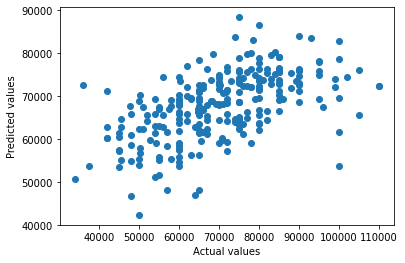

In [ ]:
# Visualize the prediction results
plt.scatter(y_test, result)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

## Including salary one year ago

In [ ]:
feature_cols  = ['Age', 'Gender', 'City', 'Position',
                 'Total years of experience','Years of experience in Germany','Seniority level',
                 'Main language at work', 'Сontract duration', 'Your main technology / programming language',
                 'Company size', 'Company type', 'Employment status', 
                 'Annual brutto salary (without bonus and stocks) one year ago',
                 'Yearly brutto salary (without bonus and stocks) in EUR']

In [ ]:
df = data[feature_cols]
df.head()

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Main language at work,Сontract duration,Your main technology / programming language,Company size,Company type,Employment status,Annual brutto salary (without bonus and stocks) one year ago,Yearly brutto salary (without bonus and stocks) in EUR
0,1,Male,MUNICH,SOFTWARE ENGINEER,5.0,3.0,Senior,English,Unlimited contract,[TYPESCRIPT],3,Product,Full-time employee,75000.0,80000.0
1,1,Male,BERLIN,BACKEND DEVELOPER,7.0,4.0,Senior,English,Unlimited contract,[RUBY],4,Product,Full-time employee,82000.0,80000.0
2,1,Male,BERLIN,FRONTEND DEVELOPER,4.0,1.0,Junior,English,Unlimited contract,[JAVASCRIPT],3,Startup,Full-time employee,NaN,54000.0
3,2,Male,BERLIN,BACKEND DEVELOPER,17.0,6.0,Senior,English,Unlimited contract,"[C#, .NET]",4,Product,Full-time employee,62000.0,62000.0
4,2,Male,BERLIN,DEVOPS,5.0,1.0,Senior,English,Unlimited contract,"[AWS, GCP, PYTHON, K8S]",2,Startup,Full-time employee,76000.0,76000.0


In [ ]:
df = df.rename(columns ={'Yearly brutto salary (without bonus and stocks) in EUR': 'Gross Salary'})

In [ ]:
categorical_columns = list(df.select_dtypes(include = 'object').columns)
print("\nCategorical variables: ", categorical_columns)
numerical_columns = list(df.select_dtypes(include = 'number').columns)
print("\nNumerical variables: ", numerical_columns)


Categorical variables:  ['Gender', 'City', 'Position', 'Seniority level', 'Main language at work', 'Сontract duration', 'Your main technology / programming language', 'Company size', 'Company type', 'Employment status']

Numerical variables:  ['Age', 'Total years of experience', 'Years of experience in Germany', 'Annual brutto salary (without bonus and stocks) one year ago', 'Gross Salary']


### Check missing values

In [ ]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'miss_rate' :df_na})
missing_data

,miss_rate
Annual brutto salary (without bonus and stocks) one year ago,28.791774
Company size,1.199657


In [ ]:
df['Сontract duration'] = df['Сontract duration'].fillna(value = 'Unlimited contract')
df = df.dropna(subset = ['Company size'])
df['Main language at work'] = df['Main language at work'].fillna(value = 'English')
df['Employment status'] = df['Employment status'].fillna(value = 'Full-time employee')
df['Seniority level'] = df['Seniority level'].fillna(value = 'Middle')

In [ ]:
df.describe()

,Age,Total years of experience,Years of experience in Germany,Annual brutto salary (without bonus and stocks) one year ago,Gross Salary
count,1153.000000,1153.000000,1153.000000,829.000000,1153.000000
mean,1.810061,8.707979,3.672246,65659.861279,69127.190919
std,0.621800,5.152843,3.570309,28700.721548,15749.458557
min,1.000000,0.000000,0.000000,12000.000000,28000.000000
25%,1.000000,5.000000,1.500000,55000.000000,60000.000000
50%,2.000000,8.000000,3.000000,65000.000000,69000.000000
75%,2.000000,12.000000,5.000000,75000.000000,80000.000000
max,4.000000,40.000000,30.000000,760000.000000,110000.000000


In [ ]:
df.columns

Index(['Age', 'Gender', 'City', 'Position', 'Total years of experience',
       'Years of experience in Germany', 'Seniority level',
       'Main language at work', 'Сontract duration',
       'Your main technology / programming language', 'Company size',
       'Company type', 'Employment status',
       'Annual brutto salary (without bonus and stocks) one year ago',
       'Gross Salary'],
      dtype='object')

In [ ]:
df = df.reset_index(drop = True)

### Change 'Your main technology / programming language'

In [ ]:
new_df = pd.DataFrame(columns = list(df.columns))
feature = 'Your main technology / programming language'
for i, items in enumerate(df[feature]):
  for item in items:
    new_df = new_df.append(df.loc[i], ignore_index=True)

In [ ]:
list_pro_langs = []
for items in df[feature]:
  for item in items:
    list_pro_langs.append(item)
new_df[feature] = list_pro_langs

### Label Encoding

In [ ]:
categorical_columns

['Gender',
 'City',
 'Position',
 'Seniority level',
 'Main language at work',
 'Сontract duration',
 'Your main technology / programming language',
 'Company size',
 'Company type',
 'Employment status']

In [ ]:
for column in categorical_columns:
  new_df[column] = new_df[column].astype('category')
  new_df[f'{column}_cat'] = new_df[column].cat.codes
new_df.head()

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Main language at work,Сontract duration,Your main technology / programming language,Company size,Company type,Employment status,Annual brutto salary (without bonus and stocks) one year ago,Gross Salary,Gender_cat,City_cat,Position_cat,Seniority level_cat,Main language at work_cat,Сontract duration_cat,Your main technology / programming language_cat,Company size_cat,Company type_cat,Employment status_cat
0,1,Male,MUNICH,SOFTWARE ENGINEER,5.0,3.0,Senior,English,Unlimited contract,TYPESCRIPT,3,Product,Full-time employee,75000.0,80000.0,1,58,71,12,2,1,138,2,2,2
1,1,Male,BERLIN,BACKEND DEVELOPER,7.0,4.0,Senior,English,Unlimited contract,RUBY,4,Product,Full-time employee,82000.0,80000.0,1,4,6,12,2,1,117,3,2,2
2,1,Male,BERLIN,FRONTEND DEVELOPER,4.0,1.0,Junior,English,Unlimited contract,JAVASCRIPT,3,Startup,Full-time employee,NaN,54000.0,1,4,29,4,2,1,64,2,3,2
3,2,Male,BERLIN,BACKEND DEVELOPER,17.0,6.0,Senior,English,Unlimited contract,C#,4,Product,Full-time employee,62000.0,62000.0,1,4,6,12,2,1,23,3,2,2
4,2,Male,BERLIN,BACKEND DEVELOPER,17.0,6.0,Senior,English,Unlimited contract,.NET,4,Product,Full-time employee,62000.0,62000.0,1,4,6,12,2,1,3,3,2,2


In [ ]:
new_cat_cols = [f'{column}_cat' for column in categorical_columns]
new_cat_cols

['Gender_cat',
 'City_cat',
 'Position_cat',
 'Seniority level_cat',
 'Main language at work_cat',
 'Сontract duration_cat',
 'Your main technology / programming language_cat',
 'Company size_cat',
 'Company type_cat',
 'Employment status_cat']

In [ ]:
new_data = new_df[[*numerical_columns,*new_cat_cols]]
new_data

,Age,Total years of experience,Years of experience in Germany,Annual brutto salary (without bonus and stocks) one year ago,Gross Salary,Gender_cat,City_cat,Position_cat,Seniority level_cat,Main language at work_cat,Сontract duration_cat,Your main technology / programming language_cat,Company size_cat,Company type_cat,Employment status_cat
0,1,5.0,3.0,75000.0,80000.0,1,58,71,12,2,1,138,2,2,2
1,1,7.0,4.0,82000.0,80000.0,1,4,6,12,2,1,117,3,2,2
2,1,4.0,1.0,NaN,54000.0,1,4,29,4,2,1,64,2,3,2
3,2,17.0,6.0,62000.0,62000.0,1,4,6,12,2,1,23,3,2,2
4,2,17.0,6.0,62000.0,62000.0,1,4,6,12,2,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,2,9.0,5.0,70000.0,70000.0,1,4,6,12,2,1,62,2,2,2
1298,2,10.0,1.5,48000.0,60000.0,1,4,15,12,2,1,31,4,2,2
1299,2,15.0,2.0,90000.0,110000.0,1,58,38,6,2,1,97,3,1,2
1300,1,7.0,7.0,33800.0,38350.0,1,69,29,8,5,1,64,3,2,2


In [ ]:
selected_col = 'Annual brutto salary (without bonus and stocks) one year ago'
new_data = new_data[~new_data[selected_col].isnull()]

### Check correlated variables

In [ ]:
df = new_data.copy()

In [ ]:
# plt.figure(figsize=(20,15))
# ax = sns.pairplot(df, size=4)

# ax.fig.set_figwidth(15)
# ax.fig.set_figheight(10)

### Correlation Matrix

<Figure size 1152x360 with 0 Axes>

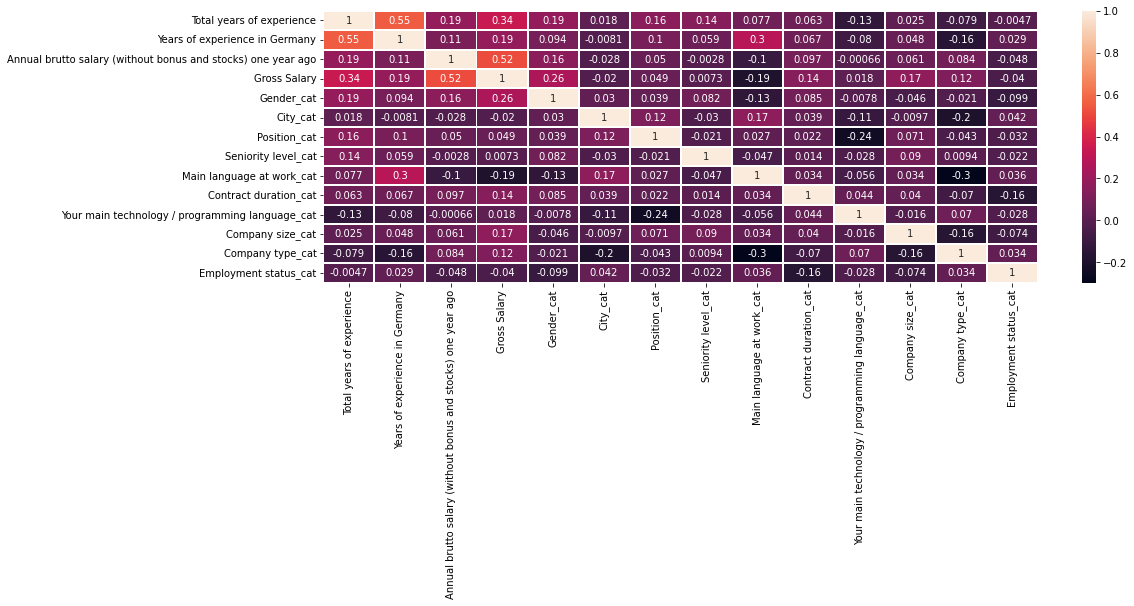

In [ ]:
## Check correlation to see if we have multicollinearity
plt.figure(figsize = (16,5))
ax = sns.heatmap(df.corr(), linewidth=1, annot=True,linewidths=.5)

### Feature Scaling

In [ ]:
for col in new_cat_cols:
  df[col] = df[col].astype('str')

In [ ]:
# Exclude the value (target of prediction) column and select all numerical columns
input_cols = df.drop(columns=['Gross Salary']).select_dtypes(include='number').columns
print(input_cols)
df[input_cols].head()

Index(['Total years of experience', 'Years of experience in Germany',
       'Annual brutto salary (without bonus and stocks) one year ago'],
      dtype='object')


,Total years of experience,Years of experience in Germany,Annual brutto salary (without bonus and stocks) one year ago
0,5.0,3.0,75000.0
1,7.0,4.0,82000.0
3,17.0,6.0,62000.0
4,17.0,6.0,62000.0
5,5.0,1.0,76000.0


In [ ]:
# Define a MinMax Scaler 
scaler =  MinMaxScaler() 

# Fit the scaler to our data and return the scaled data into 'scaled_df'
scaled_df = scaler.fit_transform(df[input_cols]) 

# scale our data 
df[input_cols] = scaled_df 

# describe the scaled data 
df.describe()

,Total years of experience,Years of experience in Germany,Annual brutto salary (without bonus and stocks) one year ago,Gross Salary
count,927.000000,927.000000,927.000000,927.000000
mean,0.228811,0.143193,0.070877,70011.991370
std,0.136710,0.129807,0.036928,15665.787213
min,0.000000,0.000000,0.000000,28800.000000
25%,0.125000,0.066667,0.057487,60000.000000
50%,0.200000,0.100000,0.070856,70000.000000
75%,0.300000,0.166667,0.084225,80000.000000
max,1.000000,1.000000,1.000000,110000.000000


### Using Statistical Model

In [ ]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Total years of experience + Years of experience in Germany


In [ ]:
# Run with other predictors as well
X = df.loc[:, ["Total years of experience","Years of experience in Germany"]]
y = df["Gross Salary"]

In [ ]:
## Run a linear regression with the above predictors
X2 = sm.add_constant(X)
# X2 = X
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Gross Salary   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     61.58
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           7.86e-26
Time:                        04:47:40   Log-Likelihood:                -10211.
No. Observations:                 927   AIC:                         2.043e+04
Df Residuals:                     924   BIC:                         2.044e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
vif

,VIF Factor,features
0,3.848592,const
1,1.443965,Total years of experience
2,1.443965,Years of experience in Germany


### Using Sklearn

#### Running with "Total years of experience + Years of experience in Germany"

In [ ]:
X = df.loc[:, ["Total years of experience","Years of experience in Germany"]]
y = df["Gross Salary"]
# Split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)


# The function to call linear regression on the train set
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Coefficients: ", lm.coef_)
print("Intercept: ", lm.intercept_)

# Use the trained model to predict on the test set and calculate the R^2 score on this test set.
result = lm.predict(X_test)
print('R^2 on test set: ', metrics.r2_score(y_test, result))
print('MSE on test set: ', metrics.mean_squared_error(y_test,result))

Coefficients:  [36594.63938004  2457.52731354]
Intercept:  61604.69771963852
R^2 on test set:  0.11073088448582669
MSE on test set:  211571011.70758995


#### Running again with an additional variable

In [ ]:
X = df.loc[:, ['Total years of experience','Years of experience in Germany','Age','Gender_cat','Seniority level_cat',
                'Position_cat','City_cat']]
y = df["Gross Salary"]
# Split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)


# The function to call linear regression on the train set
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Coefficients: ", lm.coef_)
print("Intercept: ", lm.intercept_)

# Use the trained model to predict on the test set and calculate the R^2 score on this test set.
result = lm.predict(X_test)
print('R^2 on test set: ', metrics.r2_score(y_test, result))
print('MSE on test set: ', metrics.mean_squared_error(y_test,result))

Coefficients:  [ 3.50009128e+04  3.48835272e+03 -1.04955041e+03  8.95596299e+03
 -2.05675006e+02  7.98387316e+00 -6.74399960e+00]
Intercept:  57971.0596711118
R^2 on test set:  0.13615402003504062
MSE on test set:  205522450.68698555


####  Running a linear regression with all the predictors

In [ ]:
X = df.loc[:, (df.columns != "Gross Salary")]
y = df["Gross Salary"]
# Split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)


# The function to call linear regression on the train set
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Coefficients: ", lm.coef_)
print("Intercept: ", lm.intercept_)

# Use the trained model to predict on the test set and calculate the R^2 score on this test set.
result = lm.predict(X_test)
print('R^2 on test set: ', metrics.r2_score(y_test, result))
print('MSE on test set: ', metrics.mean_squared_error(y_test,result))

Coefficients:  [-9.39415885e+02  2.79446591e+04  1.15778099e+04  1.44145390e+05
  5.99995197e+03  3.18289098e+01  1.98626354e+00 -3.12720993e+02
 -2.37386941e+03  7.25974987e+03  2.74524370e+01  2.29471208e+03
  2.03894006e+03  1.14331861e+03]
Intercept:  34932.00281823607
R^2 on test set:  0.3771464206340849
MSE on test set:  148186594.62377343


Text(0.5, 0, 'Actual values')

Text(0, 0.5, 'Predicted values')

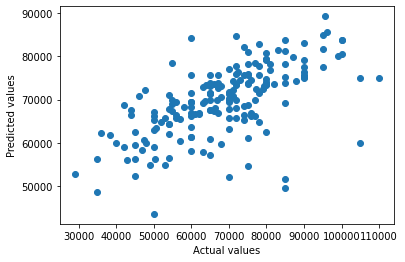

In [ ]:
# Visualize the prediction results
plt.scatter(y_test, result)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

## Excluding programming language

In [ ]:
feature_cols  = ['Age', 'Gender', 'City', 'Position',
                 'Total years of experience','Years of experience in Germany','Seniority level',
                 'Main language at work', 'Сontract duration',
                 'Company size', 'Company type', 'Employment status', 
                 'Annual brutto salary (without bonus and stocks) one year ago',
                 'Yearly brutto salary (without bonus and stocks) in EUR']

In [ ]:
df = data[feature_cols]
df.head()

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Main language at work,Сontract duration,Company size,Company type,Employment status,Annual brutto salary (without bonus and stocks) one year ago,Yearly brutto salary (without bonus and stocks) in EUR
0,1,Male,MUNICH,SOFTWARE ENGINEER,5.0,3.0,Senior,English,Unlimited contract,3,Product,Full-time employee,75000.0,80000.0
1,1,Male,BERLIN,BACKEND DEVELOPER,7.0,4.0,Senior,English,Unlimited contract,4,Product,Full-time employee,82000.0,80000.0
2,1,Male,BERLIN,FRONTEND DEVELOPER,4.0,1.0,Junior,English,Unlimited contract,3,Startup,Full-time employee,NaN,54000.0
3,2,Male,BERLIN,BACKEND DEVELOPER,17.0,6.0,Senior,English,Unlimited contract,4,Product,Full-time employee,62000.0,62000.0
4,2,Male,BERLIN,DEVOPS,5.0,1.0,Senior,English,Unlimited contract,2,Startup,Full-time employee,76000.0,76000.0


In [ ]:
df = df.rename(columns ={'Yearly brutto salary (without bonus and stocks) in EUR': 'Gross Salary'})

In [ ]:
categorical_columns = list(df.select_dtypes(include = 'object').columns)
print("\nCategorical variables: ", categorical_columns)
numerical_columns = list(df.select_dtypes(include = 'number').columns)
print("\nNumerical variables: ", numerical_columns)


Categorical variables:  ['Gender', 'City', 'Position', 'Seniority level', 'Main language at work', 'Сontract duration', 'Company size', 'Company type', 'Employment status']

Numerical variables:  ['Age', 'Total years of experience', 'Years of experience in Germany', 'Annual brutto salary (without bonus and stocks) one year ago', 'Gross Salary']


### Check missing values

In [ ]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'miss_rate' :df_na})
missing_data

,miss_rate
Annual brutto salary (without bonus and stocks) one year ago,28.791774
Company size,1.199657


In [ ]:
df['Сontract duration'] = df['Сontract duration'].fillna(value = 'Unlimited contract')
df = df.dropna(subset = ['Company size'])
df['Main language at work'] = df['Main language at work'].fillna(value = 'English')
df['Employment status'] = df['Employment status'].fillna(value = 'Full-time employee')
df['Seniority level'] = df['Seniority level'].fillna(value = 'Middle')

In [ ]:
df.describe()

,Age,Total years of experience,Years of experience in Germany,Annual brutto salary (without bonus and stocks) one year ago,Gross Salary
count,1153.000000,1153.000000,1153.000000,829.000000,1153.000000
mean,1.810061,8.707979,3.672246,65659.861279,69127.190919
std,0.621800,5.152843,3.570309,28700.721548,15749.458557
min,1.000000,0.000000,0.000000,12000.000000,28000.000000
25%,1.000000,5.000000,1.500000,55000.000000,60000.000000
50%,2.000000,8.000000,3.000000,65000.000000,69000.000000
75%,2.000000,12.000000,5.000000,75000.000000,80000.000000
max,4.000000,40.000000,30.000000,760000.000000,110000.000000


In [ ]:
df.columns

Index(['Age', 'Gender', 'City', 'Position', 'Total years of experience',
       'Years of experience in Germany', 'Seniority level',
       'Main language at work', 'Сontract duration', 'Company size',
       'Company type', 'Employment status',
       'Annual brutto salary (without bonus and stocks) one year ago',
       'Gross Salary'],
      dtype='object')

In [ ]:
df = df.reset_index(drop = True)

### Label Encoding

In [ ]:
categorical_columns

['Gender',
 'City',
 'Position',
 'Seniority level',
 'Main language at work',
 'Сontract duration',
 'Company size',
 'Company type',
 'Employment status']

In [ ]:
for column in categorical_columns:
  new_df[column] = new_df[column].astype('category')
  new_df[f'{column}_cat'] = new_df[column].cat.codes
new_df.head()

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Main language at work,Сontract duration,Your main technology / programming language,Company size,Company type,Employment status,Annual brutto salary (without bonus and stocks) one year ago,Gross Salary,Gender_cat,City_cat,Position_cat,Seniority level_cat,Main language at work_cat,Сontract duration_cat,Your main technology / programming language_cat,Company size_cat,Company type_cat,Employment status_cat
0,1,Male,MUNICH,SOFTWARE ENGINEER,5.0,3.0,Senior,English,Unlimited contract,TYPESCRIPT,3,Product,Full-time employee,75000.0,80000.0,1,58,71,12,2,1,138,2,2,2
1,1,Male,BERLIN,BACKEND DEVELOPER,7.0,4.0,Senior,English,Unlimited contract,RUBY,4,Product,Full-time employee,82000.0,80000.0,1,4,6,12,2,1,117,3,2,2
2,1,Male,BERLIN,FRONTEND DEVELOPER,4.0,1.0,Junior,English,Unlimited contract,JAVASCRIPT,3,Startup,Full-time employee,NaN,54000.0,1,4,29,4,2,1,64,2,3,2
3,2,Male,BERLIN,BACKEND DEVELOPER,17.0,6.0,Senior,English,Unlimited contract,C#,4,Product,Full-time employee,62000.0,62000.0,1,4,6,12,2,1,23,3,2,2
4,2,Male,BERLIN,BACKEND DEVELOPER,17.0,6.0,Senior,English,Unlimited contract,.NET,4,Product,Full-time employee,62000.0,62000.0,1,4,6,12,2,1,3,3,2,2


In [ ]:
new_cat_cols = [f'{column}_cat' for column in categorical_columns]
new_cat_cols

['Gender_cat',
 'City_cat',
 'Position_cat',
 'Seniority level_cat',
 'Main language at work_cat',
 'Сontract duration_cat',
 'Company size_cat',
 'Company type_cat',
 'Employment status_cat']

In [ ]:
new_data = new_df[[*numerical_columns,*new_cat_cols]]
new_data

,Age,Total years of experience,Years of experience in Germany,Annual brutto salary (without bonus and stocks) one year ago,Gross Salary,Gender_cat,City_cat,Position_cat,Seniority level_cat,Main language at work_cat,Сontract duration_cat,Company size_cat,Company type_cat,Employment status_cat
0,1,5.0,3.0,75000.0,80000.0,1,58,71,12,2,1,2,2,2
1,1,7.0,4.0,82000.0,80000.0,1,4,6,12,2,1,3,2,2
2,1,4.0,1.0,NaN,54000.0,1,4,29,4,2,1,2,3,2
3,2,17.0,6.0,62000.0,62000.0,1,4,6,12,2,1,3,2,2
4,2,17.0,6.0,62000.0,62000.0,1,4,6,12,2,1,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,2,9.0,5.0,70000.0,70000.0,1,4,6,12,2,1,2,2,2
1298,2,10.0,1.5,48000.0,60000.0,1,4,15,12,2,1,4,2,2
1299,2,15.0,2.0,90000.0,110000.0,1,58,38,6,2,1,3,1,2
1300,1,7.0,7.0,33800.0,38350.0,1,69,29,8,5,1,3,2,2


In [ ]:
selected_col = 'Annual brutto salary (without bonus and stocks) one year ago'
new_data = new_data[~new_data[selected_col].isnull()]

### Check correlated variables

In [ ]:
df = new_data.copy()

In [ ]:
# plt.figure(figsize=(20,15))
# ax = sns.pairplot(df, size=4)

# ax.fig.set_figwidth(15)
# ax.fig.set_figheight(10)

### Correlation Matrix

<Figure size 1152x360 with 0 Axes>

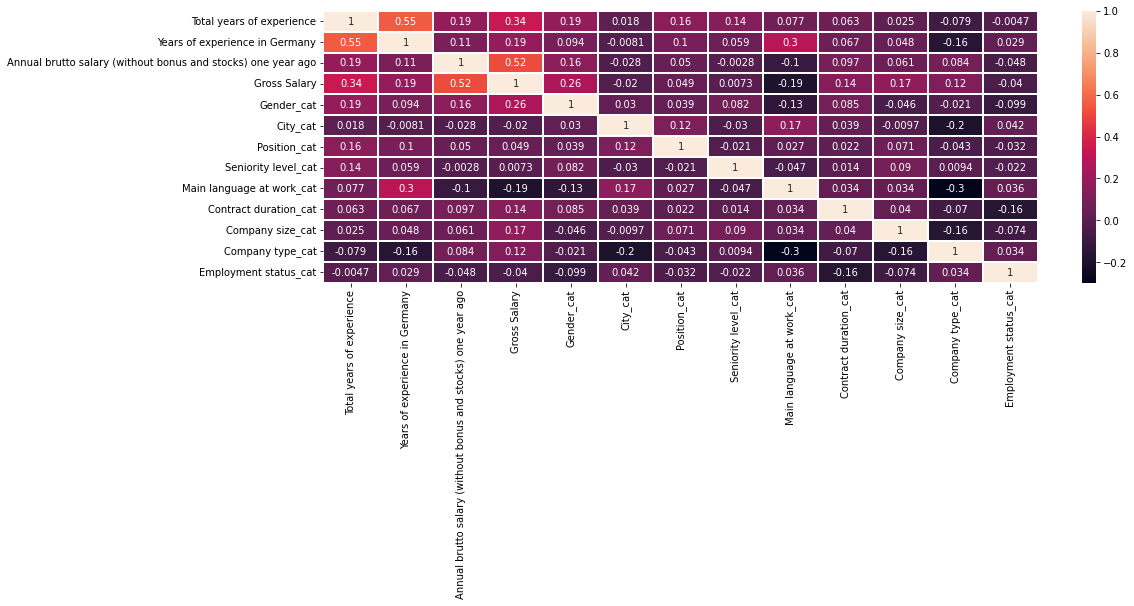

In [ ]:
## Check correlation to see if we have multicollinearity
plt.figure(figsize = (16,5))
ax = sns.heatmap(df.corr(), linewidth=1, annot=True,linewidths=.5)

### Feature Scaling

In [ ]:
for col in new_cat_cols:
  df[col] = df[col].astype('str')

In [ ]:
# Exclude the value (target of prediction) column and select all numerical columns
input_cols = df.drop(columns=['Gross Salary']).select_dtypes(include='number').columns
print(input_cols)
df[input_cols].head()

Index(['Total years of experience', 'Years of experience in Germany',
       'Annual brutto salary (without bonus and stocks) one year ago'],
      dtype='object')


,Total years of experience,Years of experience in Germany,Annual brutto salary (without bonus and stocks) one year ago
0,5.0,3.0,75000.0
1,7.0,4.0,82000.0
3,17.0,6.0,62000.0
4,17.0,6.0,62000.0
5,5.0,1.0,76000.0


In [ ]:
# Define a MinMax Scaler 
scaler =  MinMaxScaler() 

# Fit the scaler to our data and return the scaled data into 'scaled_df'
scaled_df = scaler.fit_transform(df[input_cols]) 

# scale our data 
df[input_cols] = scaled_df 

# describe the scaled data 
df.describe()

,Total years of experience,Years of experience in Germany,Annual brutto salary (without bonus and stocks) one year ago,Gross Salary
count,927.000000,927.000000,927.000000,927.000000
mean,0.228811,0.143193,0.070877,70011.991370
std,0.136710,0.129807,0.036928,15665.787213
min,0.000000,0.000000,0.000000,28800.000000
25%,0.125000,0.066667,0.057487,60000.000000
50%,0.200000,0.100000,0.070856,70000.000000
75%,0.300000,0.166667,0.084225,80000.000000
max,1.000000,1.000000,1.000000,110000.000000


### Using Statistical Model

In [ ]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Total years of experience + Years of experience in Germany


In [ ]:
# Run with other predictors as well
X = df.loc[:, ["Total years of experience","Years of experience in Germany"]]
y = df["Gross Salary"]

In [ ]:
## Run a linear regression with the above predictors
X2 = sm.add_constant(X)
# X2 = X
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Gross Salary   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     61.58
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           7.86e-26
Time:                        04:47:42   Log-Likelihood:                -10211.
No. Observations:                 927   AIC:                         2.043e+04
Df Residuals:                     924   BIC:                         2.044e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
vif

,VIF Factor,features
0,3.848592,const
1,1.443965,Total years of experience
2,1.443965,Years of experience in Germany


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 927 entries, 0 to 1301
Data columns (total 14 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Age                                                           927 non-null    object 
 1   Total years of experience                                     927 non-null    float64
 2   Years of experience in Germany                                927 non-null    float64
 3   Annual brutto salary (without bonus and stocks) one year ago  927 non-null    float64
 4   Gross Salary                                                  927 non-null    float64
 5   Gender_cat                                                    927 non-null    object 
 6   City_cat                                                      927 non-null    object 
 7   Position_cat                                                  927 non-

### Using Sklearn

#### Running with "Total years of experience + Years of experience in Germany"

In [ ]:
X = df.loc[:, ["Total years of experience","Years of experience in Germany"]]
y = df["Gross Salary"]
# Split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)


# The function to call linear regression on the train set
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Coefficients: ", lm.coef_)
print("Intercept: ", lm.intercept_)

# Use the trained model to predict on the test set and calculate the R^2 score on this test set.
result = lm.predict(X_test)
print('R^2 on test set: ', metrics.r2_score(y_test, result))
print('MSE on test set: ', metrics.mean_squared_error(y_test,result))

Coefficients:  [36594.63938004  2457.52731354]
Intercept:  61604.69771963852
R^2 on test set:  0.11073088448582669
MSE on test set:  211571011.70758995


####  Running a linear regression with all the predictors

In [ ]:
X = df.loc[:, (df.columns != "Gross Salary")]
y = df["Gross Salary"]
# Split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)


# The function to call linear regression on the train set
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Coefficients: ", lm.coef_)
print("Intercept: ", lm.intercept_)

# Use the trained model to predict on the test set and calculate the R^2 score on this test set.
result = lm.predict(X_test)
print('R^2 on test set: ', metrics.r2_score(y_test, result))
print('MSE on test set: ', metrics.mean_squared_error(y_test,result))

Coefficients:  [-7.43863259e+02  2.70426171e+04  1.10735197e+04  1.44734658e+05
  6.02183424e+03  2.89203321e+01 -6.52011053e+00 -3.26795450e+02
 -2.38111425e+03  7.28917938e+03  2.30263650e+03  2.07372219e+03
  1.13894990e+03]
Intercept:  37448.16434786842
R^2 on test set:  0.3899104613103327
MSE on test set:  145149829.99061832


Text(0.5, 0, 'Actual values')

Text(0, 0.5, 'Predicted values')

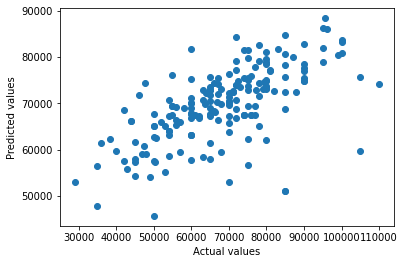

In [ ]:
# Visualize the prediction results
plt.scatter(y_test, result)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

## Feature Selection

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
X = df.loc[:, (df.columns != "Gross Salary")]
y = df["Gross Salary"]
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)

In [ ]:
clf.feature_importances_

array([0.04374331, 0.14467352, 0.13604865, 0.18739401, 0.0254551 ,
       0.08679731, 0.12639528, 0.05867365, 0.03500094, 0.00744244,
       0.07876596, 0.06310571, 0.00650411])

In [ ]:
model = SelectFromModel(clf, prefit=True)

In [ ]:
X_new = model.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 50)

In [ ]:
# The function to call linear regression on the train set
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Coefficients: ", lm.coef_)
print("Intercept: ", lm.intercept_)

# Use the trained model to predict on the test set and calculate the R^2 score on this test set.
result = lm.predict(X_test)
print('R^2 on test set: ', metrics.r2_score(y_test, result))
print('MSE on test set: ', metrics.mean_squared_error(y_test,result))

Coefficients:  [ 2.90829547e+04  2.82015954e+02  1.69742554e+05  3.16916275e+00
 -3.76775464e+00  1.86187512e+03]
Intercept:  46285.123488134544
R^2 on test set:  0.4238132031630091
MSE on test set:  137083838.19095406


Text(0.5, 0, 'Actual values')

Text(0, 0.5, 'Predicted values')

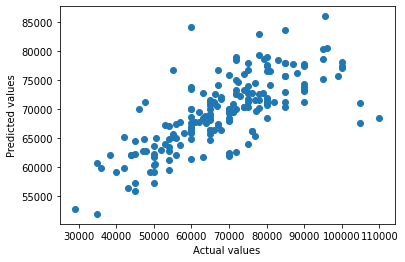

In [ ]:
# Visualize the prediction results
plt.scatter(y_test, result)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")